# **Trabajo Practico N°1 - Análisis Numérico**

## **$\textrm{Integrantes}$**


- $\textrm{Pinto, Nicolas} - 105064$ 
- $\textrm{Craviotto, Mateo} - 106255$ 
- $\textrm{Gutson, Ana Gabriela} - 105853$ 
- $\textrm{Balmaceda, Fernando} - 105525$

## **$\textrm{Bibliotecas a utilizar}$**


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sympy import *
from decimal import Decimal
init_printing(use_unicode=True)

In [ ]:
#funciones a utilizar
def f(x):
    if type(x) == Decimal:
        cte = Decimal(0.001)
        return cte*x*((x-1000)**2) - 25000
    return 0.001*x*np.square(x-1000) - 25000

def d1f(x):
    if type(x) == Decimal:
        cte1 = Decimal(0.001)
        cte2 = Decimal(2)
        return (cte1*((x-1000)**2)) + (cte1*cte2*x*(x-1000))
    return 0.001*np.square(x-1000) + 0.002*x*(x-1000)

def d2f(x):
    if type(x) == Decimal:
        cte1 = Decimal(0.002)
        cte2 = Decimal(2)
        return (cte1*cte2*(x-1000)) + (cte1*x)
    return 0.004*(x-1000) + 0.002*x


# para punto fijo
def g(x):
    if type(x) == Decimal:
        cte1 = Decimal(0.000001)
        cte2 = Decimal(0.002)
        return 25 + cte2*(x**2) - cte1*(x**3)
    return 25 + 0.002*np.square(x) - 0.000001*np.power(x, 3)

def d1g(x):
    if type(x) == Decimal:
        cte1 = Decimal(0.000003)
        cte2 = Decimal(0.004)
        return cte2*x - cte1*(x**2)
    return 0.004*x - 0.000003*np.square(x)


# metodos numericos
def Biseccion(limite_inferior_intervalo, limite_superior_intervalo, semilla, cota, iteraciones, max_iteraciones):
    
    error = limite_superior_intervalo - semilla
    if (error < cota or len(iteraciones) >= max_iteraciones):
        iteraciones.append({"raiz":semilla,"error":error})
        return

    a = f(limite_inferior_intervalo)
    b = f(limite_superior_intervalo)
    s = f(semilla)

    if s < 0:
        if a < 0:
            nueva_semilla = (semilla + limite_superior_intervalo)/2
            iteraciones.append({"raiz":semilla,"error":error})
            Biseccion(semilla, limite_superior_intervalo, nueva_semilla, cota, iteraciones, max_iteraciones)
        elif b < 0:
            nueva_semilla = (semilla + limite_inferior_intervalo)/2
            iteraciones.append({"raiz":semilla,"error":error})
            Biseccion(limite_inferior_intervalo, semilla, nueva_semilla, cota, iteraciones, max_iteraciones)
    elif s > 0:
        if a > 0:
            nueva_semilla = (semilla + limite_superior_intervalo)/2
            iteraciones.append({"raiz":semilla,"error":error})
            Biseccion(semilla, limite_superior_intervalo, nueva_semilla, cota, iteraciones, max_iteraciones)
        elif b > 0:
            nueva_semilla = (semilla + limite_inferior_intervalo)/2
            iteraciones.append({"raiz":semilla,"error":error})
            Biseccion(limite_inferior_intervalo, semilla, nueva_semilla, cota, iteraciones, max_iteraciones)

def PuntoFijo(semilla, cota, iteraciones, max_iteraciones):
    raiz = g(semilla)
    error = abs(raiz - semilla)
    iteraciones.append({"raiz":raiz, "error":error})
    
    if (error < cota or len(iteraciones) >= max_iteraciones):
        return
    PuntoFijo(raiz, cota, iteraciones, max_iteraciones)

def Secante(x0, x1, cota, iteraciones, max_iteraciones):

    raiz = x1 - ( ( f(x1)*(x1 - x0) )/( f(x1) - f(x0) ) )
    
    error = abs(raiz-x1)

    iteraciones.append({"x0":x0, "x1":x1, "raiz":raiz, "error":error})

    if (error < cota or len(iteraciones) >= max_iteraciones):
        return
    
    Secante(x1, raiz, cota, iteraciones, max_iteraciones)

def NewtonRaphson(semilla, cota, iteraciones, max_iteraciones):
    raiz = semilla - (f(semilla)/d1f(semilla))
    error = abs(raiz-semilla)
    iteraciones.append({"raiz":raiz, "error":error})

    if (cota > error or len(iteraciones) >= max_iteraciones):
        return

    NewtonRaphson(raiz, cota, iteraciones, max_iteraciones)

def NewtonRaphsonModificado(semilla, cota, iteraciones, max_iteraciones):
    raiz = semilla - (f(semilla)*d1f(semilla))/((d1f(semilla)**2) - (f(semilla)*d2f(semilla)))
    error =  abs(raiz-semilla)
    iteraciones.append({"raiz":raiz, "error":error})

    if (cota > error or len(iteraciones) >= max_iteraciones):
        return

    NewtonRaphsonModificado(raiz, cota, iteraciones, max_iteraciones)

In [ ]:
#funciones auxiliares

def mostrar_iteraciones_aux(iteraciones):
    df = pd.DataFrame(data=iteraciones, index=np.arange(1, len(iteraciones)+1, 1))
    df.index.name = "iteracion"
    return df

def mostrar_iteraciones(iteraciones):
    largo = len(iteraciones)
    if largo > 10:
        iteraciones_aux = iteraciones[0:5] + iteraciones[largo-5:largo]
        return mostrar_iteraciones_aux(iteraciones_aux)
    else:
        return mostrar_iteraciones_aux(iteraciones)


def calcular_orden_de_convergencia(iteraciones):
    ordenes_de_convergencia = []
    tolerancia = 10**(-10)
    for i in range(0, len(iteraciones)-1):
        if i >= 3:
            
            error_n = iteraciones[i]['error']
            error_n_mas_1 = iteraciones[i+1]['error']
            error_n_menos_1 = iteraciones[i-1]['error']
            if (error_n > tolerancia and error_n_mas_1 > tolerancia and error_n_menos_1 > tolerancia
                and error_n != error_n_mas_1 and error_n != error_n_menos_1):
                alpha = np.log10(error_n_mas_1/error_n)/np.log10(error_n/error_n_menos_1)
                ordenes_de_convergencia.append(alpha)
            else:
                ordenes_de_convergencia.append(ordenes_de_convergencia[-1])
        else:
            ordenes_de_convergencia.append(0)
    ordenes_de_convergencia.append(ordenes_de_convergencia[-1])
    for i in range(0, len(ordenes_de_convergencia)):
        iteraciones[i]['convergencia'] = ordenes_de_convergencia[i]
    
    return iteraciones


def graficar_orden_de_convergencia(iteraciones, cota):
    convergencias = []
    for i in range (0, len(iteraciones)-1):
        convergencias.append(iteraciones[i]["convergencia"])
    plt.plot(convergencias)
    plt.grid()
    plt.title(f"Orden de convergencia con cota {cota}")
    plt.show()


def calcular_constante_asintotica(iteraciones):
    constantes_asintoticas = []
    tolerancia = 10**(-10)
    for i in range(0, len(iteraciones)-1):
        alpha = iteraciones[i]['convergencia']
        if i >= 2 and alpha != 0:
            error_n = iteraciones[i]['error']
            error_n_mas_1 = iteraciones[i+1]['error']
            if (error_n**alpha) > tolerancia and error_n_mas_1 > tolerancia:
                constante = error_n_mas_1/(error_n**alpha)
            constantes_asintoticas.append(constante)
        else:
            constantes_asintoticas.append(0)
    constantes_asintoticas.append(constantes_asintoticas[-1])
    for i in range(0, len(constantes_asintoticas)):
        iteraciones[i]['constante_asintótica'] = constantes_asintoticas[i]
    
    return iteraciones


def graficar_constante_asintotica(iteraciones, cota):
    constantes = []
    for i in range (0, len(iteraciones)-1):
        constantes.append(iteraciones[i]["constante_asintótica"])
    plt.plot(constantes)
    plt.grid()
    plt.title(f"Constante asintótica con cota {cota}")
    plt.show()


def graficar_log_cota(iteraciones, cota):
    log10_errores = []
    for i in range (0, len(iteraciones)-1):
        log10_errores.append(np.log10(iteraciones[i]["error"]))
    plt.plot(log10_errores)
    plt.grid()
    plt.title(f"Log10(errores absolutos) vs iteraciones con cota {cota}")
    plt.show()


def graficar_orden_de_convergencia_conjunta(iters_biseccion, iters_punto_fijo, iters_secante, iters_newton_raphson, iters_newton_raphson_m, cota):
    convergencias_biseccion = []
    convergencias_punto_fijo = []
    convergencias_secante = []
    convergencias_newton_raphson = []
    convergencias_newton_raphson_m = []
    for i in range (0, len(iters_biseccion)-1):
        convergencias_biseccion.append(iters_biseccion[i]["convergencia"])

    for i in range(0, len(iters_punto_fijo)-1):
        convergencias_punto_fijo.append(iters_punto_fijo[i]["convergencia"])
    
    for i in range(0, len(iters_secante)-1):
        convergencias_secante.append(iters_secante[i]["convergencia"])

    for i in range(0, len(iters_newton_raphson)-1):
        convergencias_newton_raphson.append(iters_newton_raphson[i]["convergencia"])
    
    for i in range(0, len(iters_newton_raphson_m)-1):
        convergencias_newton_raphson_m.append(iters_newton_raphson_m[i]["convergencia"])
    
    plt.plot(convergencias_biseccion, label="Bisección")
    plt.plot(convergencias_punto_fijo, label="Punto fijo")
    plt.plot(convergencias_secante, label="Secante")
    plt.plot(convergencias_newton_raphson, label="Newton Raphson")
    plt.plot(convergencias_newton_raphson_m, label="Newton Raphson Modificado")
    plt.grid()
    plt.title(f"Orden de convergencia de todos los metodos con cota: {cota}")
    plt.legend()
    plt.show()


def graficar_constante_asintotica_conjunta(iters_biseccion, iters_punto_fijo, iters_secante, iters_newton_raphson, iters_newton_raphson_m, cota):
    constantes_biseccion = []
    constantes_punto_fijo = []
    constantes_secante = []
    constantes_newton_raphson = []
    constantes_newton_raphson_m = []
    for i in range (0, len(iters_biseccion)-1):
        constantes_biseccion.append(iters_biseccion[i]["constante_asintótica"])

    for i in range(0, len(iters_punto_fijo)-1):
        constantes_punto_fijo.append(iters_punto_fijo[i]["constante_asintótica"])
    
    for i in range(0, len(iters_secante)-1):
        constantes_secante.append(iters_secante[i]["constante_asintótica"])

    for i in range(0, len(iters_newton_raphson)-1):
        constantes_newton_raphson.append(iters_newton_raphson[i]["constante_asintótica"])
    
    for i in range(0, len(iters_newton_raphson_m)-1):
        constantes_newton_raphson_m.append(iters_newton_raphson_m[i]["constante_asintótica"])
    
    plt.plot(constantes_biseccion, label="Bisección")
    plt.plot(constantes_punto_fijo, label="Punto fijo")
    plt.plot(constantes_secante, label="Secante")
    plt.plot(constantes_newton_raphson, label="Newton Raphson")
    plt.plot(constantes_newton_raphson_m, label="Newton Raphson Modificado")
    plt.grid()
    plt.title(f"Constante asintótica de todos los metodos con cota: {cota}")
    plt.legend()
    plt.show()

def graficar_log_error_vs_iteraciones(iters_biseccion, iters_punto_fijo, iters_secante, iters_newton_raphson, iters_newton_raphson_m, cota):
    errores_biseccion = []
    errores_punto_fijo = []
    errores_secante = []
    errores_newton_raphson = []
    errores_newton_raphson_m = []
    for i in range (0, len(iters_biseccion)-1):
        errores_biseccion.append(np.log10(iters_biseccion[i]["error"]))

    for i in range(0, len(iters_punto_fijo)-1):
        errores_punto_fijo.append(np.log10(iters_punto_fijo[i]["error"]))
    
    for i in range(0, len(iters_secante)-1):
        errores_secante.append(np.log10(iters_secante[i]["error"]))

    for i in range(0, len(iters_newton_raphson)-1):
        errores_newton_raphson.append(np.log10(iters_newton_raphson[i]["error"]))
    
    for i in range(0, len(iters_newton_raphson_m)-1):
        errores_newton_raphson_m.append(np.log10(iters_newton_raphson_m[i]["error"]))

    plt.plot(errores_biseccion, label="Bisección")
    plt.plot(errores_punto_fijo, label="Punto fijo")
    plt.plot(errores_secante, label="Secante")
    plt.plot(errores_newton_raphson, label="Newton Raphson")
    plt.plot(errores_newton_raphson_m, label="Newton Raphson Modificado")
    plt.grid()
    plt.title(f"log(errores) vs iteraciones de cada método para la cota: {cota}")
    plt.legend()
    plt.show()

##**1.** $\textrm{Plan de Produccion}$


$\textrm{La empresa Numeric SA está realizando el "Budget"para el próximo ejercicio.}$

$\textrm{Se le solicita el área "Supply Chain"que indique qué mix de productos es más conveniente fabricar mensualmente}$ $\textrm{dada una serie de restricciones que tiene la planta y la contribución marginal que ofrece cada producto.}$ $\textrm{Como nuevo pasante del área le asignan el cálculo para
el producto estrella de la empresa, acero de calidad “E41”}$ $\textrm{utilizado para fabricar perfiles de "Steel Frame".}$

$\textrm{Consulta con el area de Rentabilidad la utilidad unitaria del producto, y le informan que la misma responde}$ $\textrm{a la siguiente función:}$ $0,001 · x ·(x−1000)^2$ $\textrm{, donde}$ $x$ $\textrm{es la cantidad de producto a producir (medida en kilogramos),}$ $\textrm{y que para producirse debe alcanzarse los }$ $\$$ $\textrm{25000 de contribución mensual.}$
$\textrm{Luego, llama al area de Producción y le consulta por las restricciones que tiene la línea donde se fabrica este producto.}$ $\textrm{Le informan que para que se justifique hacer el set up para prender la máquina correspondiente,}$ $\textrm{se deberan fabricar al menos 827 kilogramos del mismo.}$



### **a)**
$\quad \textrm{Formule el problema y grafiquelo.}$

Desde la empresa **Numeric SA** se asigna calcular la conveniencia que presenta fabricar el producto **acero de calidad "E41".**

El área de Rentabilidad informa que la utilidad unitaria del producto esta dada por la ecuación
$$f(x) = 0.001*x*(x-1000)^2$$
donde $x$ es la cantidad (en kilogramos) de producto a producir.

Además, ésta área indica que para asegurar la rentabilidad de fabricar el producto, debe alcanzarse los $\$25000$ de contribución mensuales.

Juntando la información brindada entonces por el área de Rentabilidad,
\begin{aligned}
25000 &= 0.001·x·(x-1000)^2 \\
0 &= 0.001·x·(x-1000)^2 - 25000
\end{aligned}

Luego, desde el área de Producción dicen que además, se deberán fabricar al menos $827 \space kg$ para justificar la utilización de la maquinaria. Por ende, el $x$ que cumpla con la ecuación anterior deberá ser mayor o igual a $827$.

Se tiene que cumplir entonces:

$$\left\{
  \begin{array}{ll}
0 = 0.001·x·(x-1000)^2 - 25000\\
x \geq 827
  \end{array}
\right.$$

#### $\textrm{Visualizacion completa}$
Se visualiza entonces la función de la utilidad unitaria condicionada a la contribución mensual impuesta.

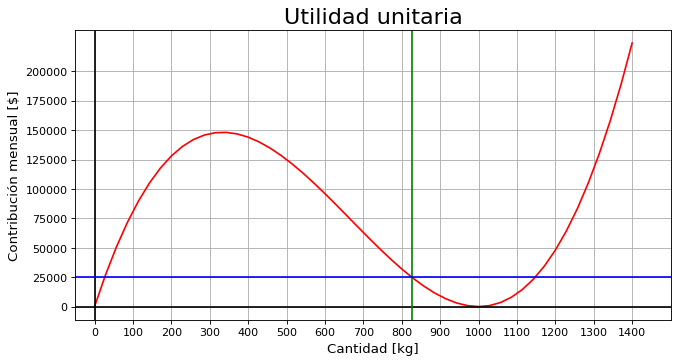

In [ ]:
def f_sin_condicion(x):
  return 0.001*x*np.square(x-1000)

#limite de la curva
x = np.linspace(0, 1400)

#tamaño de la figura
fig, ax = plt.subplots(dpi=80, figsize=(6.4 * 1.5, 4.8))

#curva a graficar
ax.plot(x, f_sin_condicion(x), color="red")

#intervalo de marcas
ax.set_xticks(np.arange(0, 1401, 100))
ax.set_yticks(np.arange(0, 200001, 25000))

#ejes cartesianos
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')

#extremo impuesto por consigna
ax.axvline(x=827, color="green")

#condicion de ganancia
ax.axhline(y=25000, color="blue")

#limite del grafico
plt.xlim(-50, 1500)

#labels
plt.title("Utilidad unitaria", fontsize=20)
plt.xlabel("Cantidad [kg]", fontsize=12)
plt.ylabel("Contribución mensual [$]", fontsize=12)

plt.grid()
plt.show()

Se puede ver que cerca de $x=827$ hay una raiz en la recta $y=25000$, pero esa raiz es menor a $827$ por ende la raiz que buscaremos será la que se encuentra en el intervalor $[1100, 1200]$

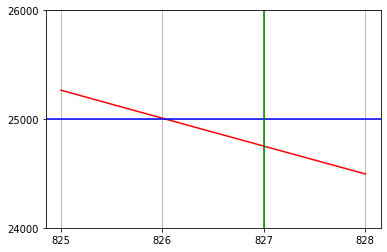

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(825, 828)
ax.plot(x, f_sin_condicion(x), color="red")
ax.set_xticks(np.arange(825, 829, 1))
ax.set_yticks(np.arange(24000, 26001, 1000))
ax.axhline(y=25000, color="blue")
ax.axvline(x=827, color="green")
plt.grid()
plt.show()

### **b) c) d)**
$\quad \textrm{Hallar las cantidades a fabricar del producto “E41” utilizando los metodos vistos en clase:}$

$\quad \textrm{Biseccion, Punto Fijo, Newton-Raphson, Newton-Raphson modificado y Secante.}$

$\quad \textrm{Use para todos los metodos como criterio de parada las siguientes cotas:}$
$1 · 10^{−5} \textrm{ y }1 · 10^{−13},$ $\textrm{use como semilla un valor tomado con el criterio que considere correcto, justificar.}$

$\quad \textrm{Realizar una tabla con los resultados de las iteraciones, convergencia P y la constante asintotica } \lambda .$ $\textrm{En caso de que se encuentren más de 12 iteraciones, solamente incluir en
la tabla las primeras 5 iteraciones y luego las últimas 5.}$

$\quad \textrm{Compare los resultados obtenidos para los distintos metodos y cotas, grafique el orden de convergencia P}$ $\textrm{ y la constante asintótica } \lambda \textrm{ para todos los casos.} $ 

$\quad \textrm{Realice un gráfico } \log _{10}(∆x) \textrm{ vs iteraciones, para visualizar el comportamiento de la constante asintótica}$ $\textrm{y el orden de convergencia.}$ $\textrm{Discuta ventajas y desventajas. ¿Son las que esperaba en base a la teoria?}$


Para obtener el valor de $x$ que satisfaga los requisitos de **Numeric SA**, es decir, la raíz de $0 = 0.0001·x·(x-1000)^2 - 25000$ mayor o igual a $827$, se utilizarán métodos de búsqueda de raíces como:

$\quad 1.$ Bisección.

$\quad 2.$ Punto fijo.

$\quad 3.$ Secante.

$\quad 4.$ Newton - Raphson.

$\quad 5.$  Newton - Raphson modificado.


#### $\textrm{Analisis individual por metodo}$


Por enunciado, se pide una cota menor a $1 \times 10^{-5}$  y  $1 \times 10^{-13}$.

##### $\textrm{Biseccion}$


El método de bisección se basa en elegir un intervalo donde se presume podría estar la raíz, luego una semilla la cual en general suele ser el valor medio de dicho intervalo. Se evalúan los límites del intervalo y la semilla en la función. Para determinar como seguir iterando hay que fijarse en el signo de los resultados que se obtuvieron de evaluar los puntos anteriores.

Si uno de los extremos da positivo y la semilla negativo, se toma como nuevo intervalo el que esta conformado por la semilla y el extremo positivo. Lo mismo si se tiene un extremo negativo y semilla positiva. El procedimiento del metodo se basa en que si hay un cambio de signo entre puntos, se puede asegurar que al menos hay una raíz. La condición de corte de este procedimiento está dada por una cota de error que se obtiene restando la semilla con uno de los extremos en valor absoluto.

Dado que $f(x)$ es una funcion continua en el intervalo $[1100,1200]$ y $f(1100)*f(1200) < 0$, entonces el teorema de Bolzano garantiza la existencia de $p\epsilon(1100, 1200)$ tal que  $f(p) = 0$. Por lo tanto, para este caso se va a tomar el intervalo $[1100 , 1200]$ y como semilla $x = 1150$. 

Además, definimos una cantidad máxima de iteraciones (100) para los métodos utilizados, que actúa de criterio de paro indispensable.

In [ ]:
lim_inf_int = Decimal(1100)
lim_sup_int = Decimal(1200)
semilla = Decimal(1150)
cota_1 = Decimal(1e-5)
cota_2 = Decimal(1e-13)
max_iteraciones = 100

iteraciones_1 = []
Biseccion(lim_inf_int, lim_sup_int, semilla, cota_1, iteraciones_1, max_iteraciones)

iteraciones_2 = []
Biseccion(lim_inf_int, lim_sup_int, semilla, cota_2, iteraciones_2, max_iteraciones)

print("Con cota 1e-5:", len(iteraciones_1), "iteraciones.\nCon cota 1e-13:", len(iteraciones_2), "iteraciones.")

Con cota 1e-5: 24 iteraciones.
Con cota 1e-13: 50 iteraciones.


Se calcula el orden de convergencia y se grafica para la cota $1 \times 10^{-5}$:

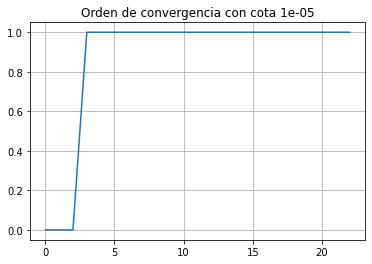

In [ ]:
iteraciones_1 = calcular_orden_de_convergencia(iteraciones_1)
graficar_orden_de_convergencia(iteraciones_1, 1e-5)

Al ser bisección un método lineal, y como se puede ver en el gráfico, tiene orden de convergencia 1 (constante). A continuación se calcula y grafica la constante asintótica, con los valores de cada iteración del orden de convergencia como $\alpha$.

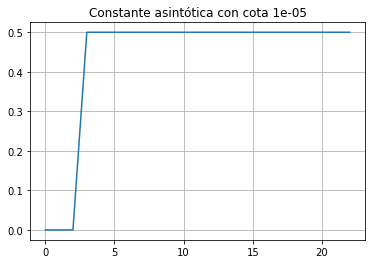

In [ ]:
iteraciones_1 = calcular_constante_asintotica(iteraciones_1)
graficar_constante_asintotica(iteraciones_1, 1e-5)

Se puede observar que la constante asintótica se mantiene en $0.5$. Como se está utilizando un método lineal, esto quiere decir que el error se reduce a la mitad.

Ahora, se muestran la tabla de las iteraciones, donde se ve la raíz y el error cometido en esa iteración, además de la convergencia y la constante asintótica. Cabe aclarar que los valores para los que no se puede calcular el orden de convergencia y la constante asintótica se muestran como $0$, y que a su vez en la última iteración se muestra el mismo resultado que en la anteúltima.

In [ ]:
df_1 = mostrar_iteraciones(iteraciones_1)
df_1

,raiz,error,convergencia,constante_asintótica
iteracion,,,,
1,1150,50,0,0
2,1125,25,0,0
3,1137.5,12.5,0,0
4,1143.75,6.25,1,0.5
5,1146.875,3.125,1,0.5
6,1147.596263885498046875,0.000095367431640625,1,0.5
7,1147.5963115692138671875,0.0000476837158203125,1,0.5
8,1147.59628772735595703125,0.00002384185791015625,1,0.5
9,1147.596299648284912109375,0.000011920928955078125,1,0.5


Ahora se grafica $log_{10}({\Delta x})$ vs. iteraciones para visualizar el comportamiento de la constante asintótica y el orden de convergencia.

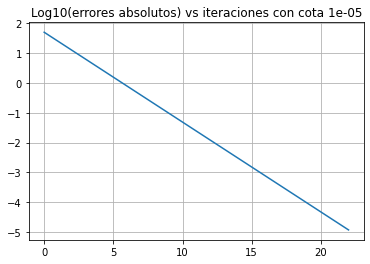

In [ ]:
graficar_log_cota(iteraciones_1, 1e-5)

Como se trata de un método lineal, vemos que claramente el error disminuye de esa forma al aumentar las iteraciones.

Para el caso de la cota $1 \times 10^{-13}$:

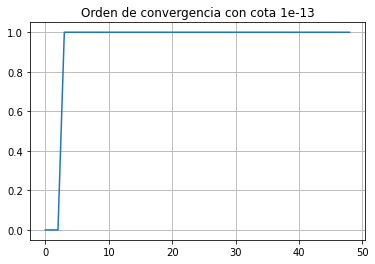

In [ ]:
iteraciones_2 = calcular_orden_de_convergencia(iteraciones_2)
graficar_orden_de_convergencia(iteraciones_2, 1e-13)

Vemos que el orden de convergencia aproximadamente se mantiene en $1$ al aumentar $n$ (cantidad de iteraciones). Ahora, calculamos la constante asintótica con ese valor para cada iteración y la graficamos.

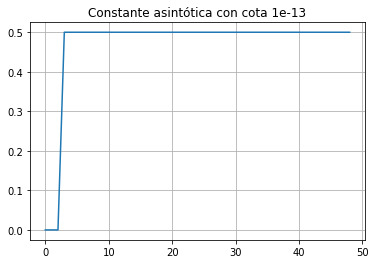

In [ ]:
iteraciones_2 = calcular_constante_asintotica(iteraciones_2)
graficar_constante_asintotica(iteraciones_2, 1e-13)

Se ve que la constante asintótica se mantine alrededor del valor $0.5$, por lo que podríamos decir que el error se reduce a la mitad, aproximadamente. En la tabla a continuación se puede ver que el valor exacto es $0.4999999999999367310556818017$, bastante cercano a $0.5$:

In [ ]:
df_2 = mostrar_iteraciones(iteraciones_2)
df_2

,raiz,error,convergencia,constante_asintótica
iteracion,,,,
1,1150,50,0,0
2,1125,25,0,0
3,1137.5,12.5,0,0
4,1143.75,6.25,1,0.5
5,1146.875,3.125,1,0.5
6,1147.596288534585085017170060,1.421085471520E-12,0.9999999999999940515251020294,0.4999999999999367310556818017
7,1147.596288534585795559905820,7.10542735760E-13,0.9999999999999940515251020294,0.4999999999999367310556818017
8,1147.596288534586150831273700,3.55271367880E-13,0.9999999999999940515251020294,0.4999999999999367310556818017
9,1147.596288534585973195589760,1.77635683940E-13,0.9999999999999940515251020294,0.4999999999999367310556818017


Ahora graficamos $log_{10}({\Delta x})$ vs. iteraciones para visualizar el comportamiento de la constante asintótica y el orden de convergencia.

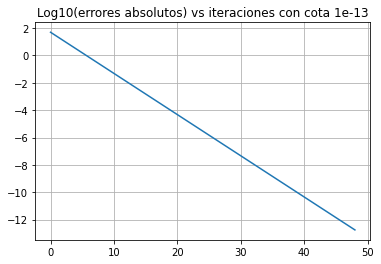

In [ ]:
graficar_log_cota(iteraciones_2, 1e-13)

En este caso ocurre lo mismo que con la cota anterior.

##### $\textrm{Punto Fijo}$

Para el metodo de punto fijo se debe buscar la funcion de iteracion de punto fijo $g(x)$ despejando $0 = 0.001*x*(x-1000)^2 - 25000$ de forma tal que de un lado del igual quede $x$ y del otro una funcion de $x$ (es decir, $g(x)$). Esa es la funcion en la cual vamos a ir evaluando las semillas hasta obtener una aproximacion apropiada de la raiz. En general se utiliza el limite superior del intervalo como semilla. Dado que $f(x)$ es una funcion continua en el intervalo $[1100,1200]$ y $f(1100)*f(1200) < 0$, entonces el teorema de Bolzano garantiza la existencia de $p\epsilon(1100, 1200)$ tal que  $f(p) = 0$. Por lo tanto, para nuestro caso utilzaremos como semilla el límite superior de ese intervalo, es decir, $x = 1200$.

$
0 = 0.001*x*(x-1000)^2 - 25000 \\
0 = 1000*x - 25000 - 2*x^2 + 0.001x^3 \\
0 = 1000 (x - 25 - 0.002*x^2 + 0.000001x^3) \\
0 = x - 25 - 0.002*x^2 + 0.000001x^3 \\
$

$
g(x)=25 + 0.002*x^2 - 0.000001x^3 \\
$

Para demostrar que en el intervalo $[1100,1200]$ existe una raiz y es unica se deben cumplir $2$ condiciones:
1. la funcion $g(x)$ debe entrar por la izquierda y salir por la derecha del area $[1100,1200] \times [1100,120]$.
2. la derivada de $g(x)$ no debe superar el valor 1.

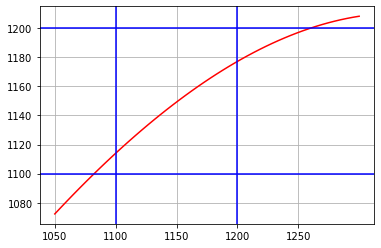

In [ ]:
x = np.linspace(1050, 1300)
fig, ax = plt.subplots()
ax.plot(x, g(x), color="red")
ax.set_xticks(np.arange(1050, 1300, 50))
ax.grid(True, which='both')
ax.axvline(x=1100, color='blue')
ax.axvline(x=1200, color='blue')
ax.axhline(y=1100, color='blue')
ax.axhline(y=1200, color='blue')

plt.show()

Como se puede ver en el grafico, la funcion $g(x)$ (en rojo) entra por izquierda y sale por derecha del area $[1100,1200] \times [1100,1200]$ (marcada por las rectas azules), lo que nos garantiza la existencia de la raiz.

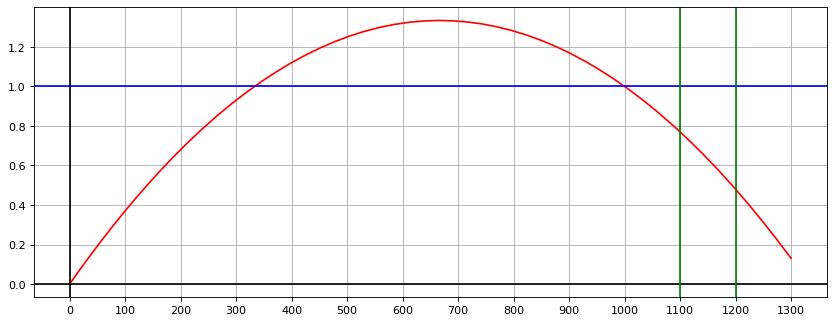

In [ ]:
x = np.linspace(0, 1300)
fig, ax = plt.subplots(dpi=80, figsize=(6.4 * 2, 4.8))
ax.plot(x, d1g(x), color="red")
ax.set_xticks(np.arange(0, 1301, 100))
ax.grid(True, which='both')
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')
ax.axhline(y=1, color='blue')
ax.axvline(x=1100, color='green')
ax.axvline(x=1200, color='green')
plt.show()

Como se puede ver en el grafico $|g'(x)| < 1$ en el intervalo $[1100, 1200]$, lo que nos garantiza la unicidad de la raiz.

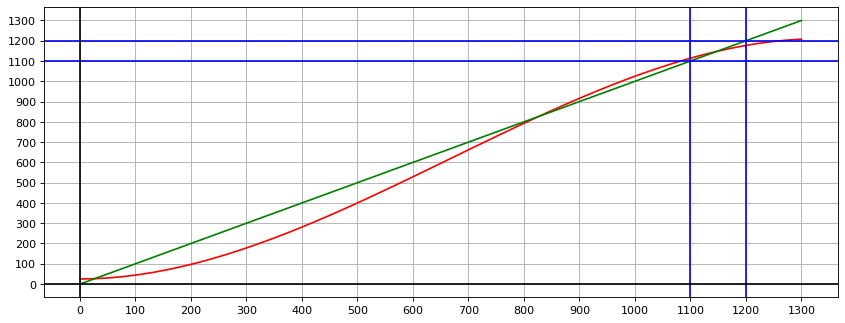

In [ ]:
x = np.linspace(0, 1300)
fig, ax = plt.subplots(dpi=80, figsize=(6.4 * 2, 4.8))
ax.plot(x, g(x), color="red")
ax.plot(x, x, color="green")
ax.set_xticks(np.arange(0, 1301, 100))
ax.set_yticks(np.arange(0, 1301, 100))
ax.grid(True, which='both')
ax.axvline(x=1100, color='blue')
ax.axvline(x=1200, color='blue')
ax.axhline(y=1100, color='blue')
ax.axhline(y=1200, color='blue')
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')
plt.show()

Ademas, para probar existencia y unicidad se puede ver como la funcion $g(x)$ (roja) intersecta a la recta $y=x$ (verde).

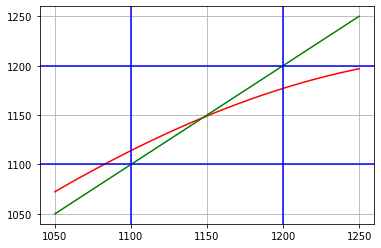

In [ ]:
x = np.linspace(1050, 1250)
fig, ax = plt.subplots()
ax.plot(x, g(x), color="red")
ax.plot(x, x, color="green")
ax.grid(True, which='both')
ax.set_xticks(np.arange(1050, 1251, 50))
ax.set_yticks(np.arange(1050, 1251, 50))
ax.axvline(x=1100, color='blue')
ax.axvline(x=1200, color='blue')
ax.axhline(y=1100, color='blue')
ax.axhline(y=1200, color='blue')
plt.show()

Entonces, estamos aptos para utilizar el metodo de punto fijo.

In [ ]:
semilla = Decimal(1200)
cota_1 = Decimal(1e-5)
cota_2 = Decimal(1e-13)
max_iteraciones = 100

iteraciones_3 = []
PuntoFijo(semilla, cota_1, iteraciones_3, max_iteraciones)

iteraciones_4 = []
PuntoFijo(semilla, cota_2, iteraciones_4, max_iteraciones)

print("Con cota 1e-5:", len(iteraciones_3), "iteraciones.\nCon cota 1e-13:", len(iteraciones_4), "iteraciones.")

Con cota 1e-5: 33 iteraciones.
Con cota 1e-13: 74 iteraciones.


Calculamos el orden de convergencia y lo graficamos para la cota $1 \times 10^{-5}$:

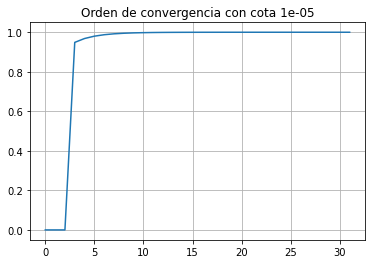

In [ ]:
iteraciones_3 = calcular_orden_de_convergencia(iteraciones_3)
graficar_orden_de_convergencia(iteraciones_3, 1e-5)

Vemos que el orden de convergencia se mantiene aproximadamente en $1$ al aumentar $n$ (cantidad de iteraciones). Ahora, calculamos la constante asintótica con los valores de cada iteración y la graficamos.

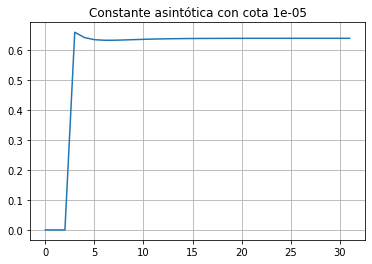

In [ ]:
iteraciones_3 = calcular_constante_asintotica(iteraciones_3)
graficar_constante_asintotica(iteraciones_3, 1e-5)

Podemos ver que con la cota $1 \times 10^{-5}$ la constante asintótica se mantiene aproximadamente en $0.64$, pero tiene un pico en $0.66$, aproximadamente. Por lo tanto, se podría decir que el error se reduce casi en esa cantidad.

A continuación mostramos la tabla de iteraciones para el método de Punto Fijo con la cota mencionada.

In [ ]:
df_3 = mostrar_iteraciones(iteraciones_3)
df_3

,raiz,error,convergencia,constante_asintótica
iteracion,,,,
1,1177.000000000000138147306095,22.999999999999861852693905,0,0
2,1165.125767000000207719676870,11.874232999999930427629225,0,0
3,1158.356843221365208980980346,6.768923778634998738696524,0,0
4,1154.308856320577319471319102,4.047986900787889509661244,0.9486914551096008903293127799,0.6596783453088238950963887432
5,1151.823350571445178913302732,2.485505749132140558016370,0.9682968610188851953461814241,0.6418404136630864661273981667
6,1147.596378490256019078546944,0.000050720248286934735767,0.9999993438240894665567342160,0.6394489475839568682575787442
7,1147.596346057036170854302061,0.000032433219848224244883,0.9999995804062297580128659192,0.6394504436434295064285079360
8,1147.596325317509401775253282,0.000020739526769079048779,0.9999997316893925019120692232,0.6394514435607311988014298075
9,1147.596312055550699497463501,0.000013261958702277789781,0.9999998284278895940988611528,0.6394521106218626623588479326


Ahora graficamos $log_{10}({\Delta x})$ vs. iteraciones para visualizar el comportamiento de la constante asintótica y el orden de convergencia.

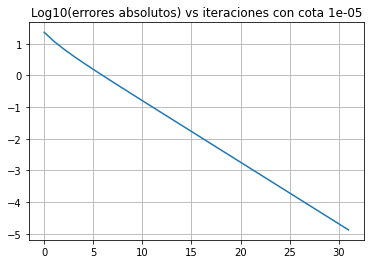

In [ ]:
graficar_log_cota(iteraciones_3, 1e-5)

Como se trata de un método lineal, vemos que claramente el error disminuye de esa forma al aumentar las iteraciones.

Calculamos el orden de convergencia y lo graficamos para la cota $1 \times 10^{-13}$:

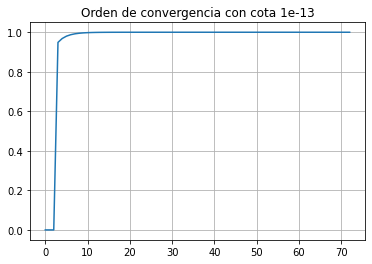

In [ ]:
iteraciones_4 = calcular_orden_de_convergencia(iteraciones_4)
graficar_orden_de_convergencia(iteraciones_4, 1e-13)

Vemos que el orden de convergencia no queda constante al aumentar las iteraciones, aunque se mantiene alrededor de 1. A continuación, calculamos y graficamos la constante asintótica para cada iteración con esos valores de $\alpha$.

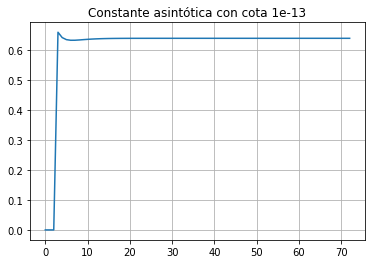

In [ ]:
iteraciones_4 = calcular_constante_asintotica(iteraciones_4)
graficar_constante_asintotica(iteraciones_4, 1e-13)

En el caso de la cota $1 \times 10^{-13}$, los resultados son muy similares a los anteriores, con la cota $1 \times 10^{-5}$. La constante asintótica se mantiene aproximadamente en $0.64$, pero tiene un pico en $0.66$, aproximadamente. Por lo tanto, se podría decir que el error se reduce casi en esa cantidad.

A continuación mostramos la tabla de iteraciones para el método de Punto Fijo con la cota mencionada.

In [ ]:
df_4 = mostrar_iteraciones(iteraciones_4)
df_4

,raiz,error,convergencia,constante_asintótica
iteracion,,,,
1,1177.000000000000138147306095,22.999999999999861852693905,0,0
2,1165.125767000000207719676870,11.874232999999930427629225,0,0
3,1158.356843221365208980980346,6.768923778634998738696524,0,0
4,1154.308856320577319471319102,4.047986900787889509661244,0.9486914551096008903293127799,0.6596783453088238950963887432
5,1151.823350571445178913302732,2.485505749132140558016370,0.9682968610188851953461814241,0.6418404136630864661273981667
6,1147.596288534587330496785906,5.53791784262E-13,0.9999999999975800005801908081,0.6394534297273819538428737956
7,1147.596288534586976372730085,3.54124055821E-13,0.9999999999975800005801908081,0.6394534297273819538428737956
8,1147.596288534586749926888029,2.26445842056E-13,0.9999999999975800005801908081,0.6394534297273819538428737956
9,1147.596288534586605125317671,1.44801570358E-13,0.9999999999975800005801908081,0.6394534297273819538428737956


Ahora graficamos $log_{10}({\Delta x})$ vs. iteraciones para visualizar el comportamiento de la constante asintótica y el orden de convergencia.

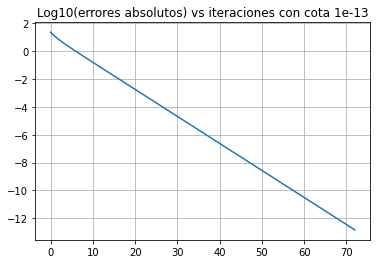

In [ ]:
graficar_log_cota(iteraciones_4, 1e-13)

Ocurre lo mismo que para la cota $1 \times 10^{-5}$.

##### $\textrm{Secante}$



Para el metodo de la secante utilizamos una formula la cual necesita dos semillas.

$
x_{i+1} = x_{i} - \frac{ f(x_{i}) (x_{i} - x_{i-1}) }{ f(x_{i}) - f(x_{i-1}) } 
$

En este caso utiizaremos los extremos del intervalo $[1100,1200]$. Se cumple de igual manera el teorema de Bolzano para este intervalo, pues  f(1100)∗f(1200)<0 , por lo que existe  pϵ(1100,1200)  tal que  f(p)=0 . Utilizaremos como semillas los limites del intervalo.

In [ ]:
lim_inf_int = Decimal(1100)
lim_sup_int = Decimal(1200)
cota_1 = Decimal(1e-5)
cota_2 = Decimal(1e-13)
max_iteraciones = 100

iteraciones_5 = []
Secante(lim_inf_int, lim_sup_int, cota_1, iteraciones_5, max_iteraciones)

iteraciones_6 = []
Secante(lim_inf_int, lim_sup_int, cota_2, iteraciones_6, max_iteraciones)

print("Con cota 1e-5:", len(iteraciones_5), "iteraciones.\nCon cota 1e-13:", len(iteraciones_6), "iteraciones.")

Con cota 1e-5: 6 iteraciones.
Con cota 1e-13: 8 iteraciones.


Calculamos el orden de convergencia para las iteraciones obtenidas y realizamos el gráfico, con la cota $1 \times 10^{-5}$:

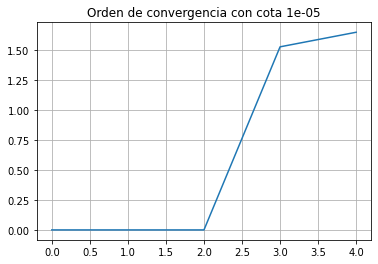

In [ ]:
iteraciones_5 = calcular_orden_de_convergencia(iteraciones_5)
graficar_orden_de_convergencia(iteraciones_5, 1e-5)

Podemos observar que no se ve un valor constante al final, esto es porque como la cota pedida es $1\times 10^{-5}$, no se logra una cantidad de iteraciones suficiente como para mostrar un orden de convergencia constante en las últimas iteraciones. Lo mismo ocurre a continuación, en el gráfico de la constante asintótica:

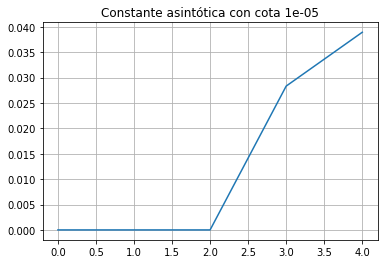

In [ ]:
iteraciones_5 = calcular_constante_asintotica(iteraciones_5)
graficar_constante_asintotica(iteraciones_5, 1e-5)

Podemos observar que el método de la secante con cota $1 \times 10^{-5}$ reduce el error en, aproximadamente, $0.040$, de acuerdo al gráfico de la constante asintótica. Esto es muchísimo más alto que la reducción de error de los métodos probados anteriormente, por lo que estamos frente a un método de búsqueda de raíces más poderoso. Podemos ver los valores exactos en la tabla a continuación:

In [ ]:
df_5 = mostrar_iteraciones(iteraciones_5)
df_5

,x0,x1,raiz,error,convergencia,constante_asintótica
iteracion,,,,,,
1,1100,1200,1137.837837837837836431305290,62.162162162162163568694710,0,0
2,1200,1137.837837837837836431305290,1145.806440508769210742602215,7.968602670931374311296925,0,0
3,1137.837837837837836431305290,1145.806440508769210742602215,1147.668957725868297052699843,1.862517217099086310097628,0,0
4,1145.806440508769210742602215,1147.668957725868297052699843,1147.595765076926455029605193,0.073192648941842023094650,1.526509725166130600269566865,0.02832414026821765130803943498
5,1147.668957725868297052699843,1147.595765076926455029605193,1147.596288382401777260160082,0.000523305475322230554889,1.648116996485204535918822020,0.03892653520512080373395890988
6,1147.595765076926455029605193,1147.596288382401777260160082,1147.596288534586323883877593,1.52184546623717511E-7,1.648116996485204535918822020,0.03892653520512080373395890988


Ahora graficamos $log_{10}({\Delta x})$ vs. iteraciones para visualizar el comportamiento de la constante asintótica y el orden de convergencia.

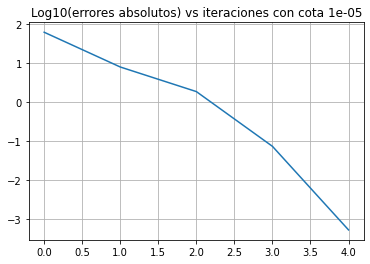

In [ ]:
graficar_log_cota(iteraciones_5, 1e-5)

Se observa una mayor disminución del error a medida que aumenta la cantidad de iteraciones, en comparación a los métodos anteriores, los cuales eran lineales, mientras en este caso se tiene un método de convergencia supralineal.

Hacemos lo mismo para la cota $1 \times 10^{-13}$:

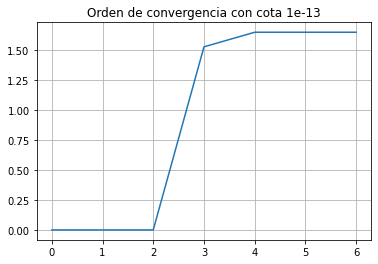

In [ ]:
iteraciones_6 = calcular_orden_de_convergencia(iteraciones_6)
graficar_orden_de_convergencia(iteraciones_6, 1e-13)

Observamos un comportamiento similar al de la cota anterior. Procedemos con el cálculo de la constante asintótica usando los resultados del orden de convergencia como $\alpha$.

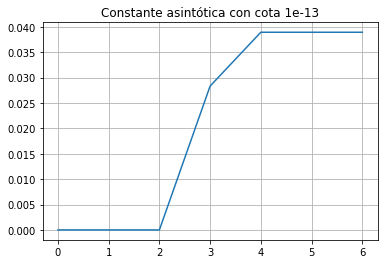

In [ ]:
iteraciones_6 = calcular_constante_asintotica(iteraciones_6)
graficar_constante_asintotica(iteraciones_6, 1e-13)

En este caso ocurre prácticamente lo mismo que con la cota $1 \times 10^{-5}$. Se puede concluir que, como el cambio de la cota genera solo dos iteraciones más, entonces el comportamiento va a ser similar. Además, se observa una constancia en la constante asintótica al final del gráfico, es decir, en las últimas iteraciones. A continuación mostramos la tabla de iteraciones para la cota $1 \times 10^{-13}$:

In [ ]:
df_6 = mostrar_iteraciones(iteraciones_6)
df_6

,x0,x1,raiz,error,convergencia,constante_asintótica
iteracion,,,,,,
1,1100,1200,1137.837837837837836431305290,62.162162162162163568694710,0,0
2,1200,1137.837837837837836431305290,1145.806440508769210742602215,7.968602670931374311296925,0,0
3,1137.837837837837836431305290,1145.806440508769210742602215,1147.668957725868297052699843,1.862517217099086310097628,0,0
4,1145.806440508769210742602215,1147.668957725868297052699843,1147.595765076926455029605193,0.073192648941842023094650,1.526509725166130600269566865,0.02832414026821765130803943498
5,1147.668957725868297052699843,1147.595765076926455029605193,1147.596288382401777260160082,0.000523305475322230554889,1.648116996485204535918822020,0.03892653520512080373395890988
6,1147.595765076926455029605193,1147.596288382401777260160082,1147.596288534586323883877593,1.52184546623717511E-7,1.648116996485204535918822020,0.03892653520512080373395890988
7,1147.596288382401777260160082,1147.596288534586323883877593,1147.596288534586005102186434,3.18781691159E-13,1.648116996485204535918822020,0.03892653520512080373395890988
8,1147.596288534586323883877593,1147.596288534586005102186434,1147.596288534586005102186628,1.94E-22,1.648116996485204535918822020,0.03892653520512080373395890988


Ahora graficamos $log_{10}({\Delta x})$ vs. iteraciones para visualizar el comportamiento de la constante asintótica y el orden de convergencia.

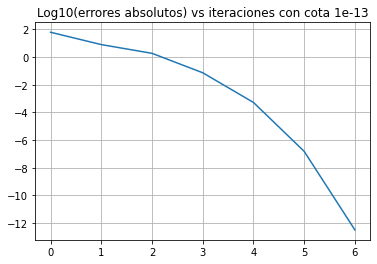

In [ ]:
graficar_log_cota(iteraciones_6, 1e-13)

Los resultados son prácticamente iguales a los de la cota $1 \times 10^{-5}$.

##### $\textrm{Newton - Raphson}$

Para Newton-Raphson usamos la formula:

$
x_{i} = x_{i-1} - \frac{f(x_{i-1})}{f'(x_{i-1})}
$

Como semilla utilizo el valor medio del intervalo $[1000, 1500]$, es decir $x=1250$. Realizamos esta modificación en el intervalo para tener una mayor cantidad de iteraciones, y así poder realizar los cálculos y gráficos de orden de convergencia y constante asintótica correctamente. Se cumple de igual manera el teorema de Bolzano para este intervalo, pues  f(1000)∗f(1500)<0 , por lo que existe  pϵ(1000,1500)  tal que  f(p)=0 .

Las condiciones para utilizar Newton-Raphson son:
1. La función $f(x)$ debe ser continua.
2. La derivada de $f(x)$ en el intervalo donde buscamos la raíz no se debe anular.

La condicion 1 se cumple dado que f(x) es un polinomio. La condicion 2 se demuestra a continuacion:

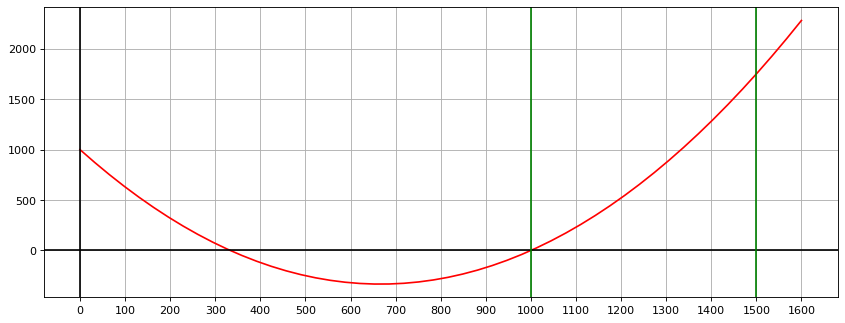

In [ ]:
x = np.linspace(0, 1600)
fig, ax = plt.subplots(dpi=80, figsize=(6.4*2, 4.8))
ax.plot(x, d1f(x), color="red")
ax.set_xticks(np.arange(0, 1601, 100))
ax.grid(True, which='both')
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')

ax.axvline(x=1000, color='green')
ax.axvline(x=1500, color='green')
plt.show()

Como se puede ver en el gráfico la derivada de $f(x)$ no se anula en el intervalo $[1000, 1500]$.

Entonces estamos aptos para utilizar Newton-Raphson.

In [ ]:
semilla = Decimal(1250)
cota_1 = Decimal(1e-5)
cota_2 = Decimal(1e-13)
max_iteraciones = 100

iteraciones_7 = []
NewtonRaphson(semilla, cota_1, iteraciones_7, max_iteraciones)

iteraciones_8 = []
NewtonRaphson(semilla, cota_2, iteraciones_8, max_iteraciones)

print("Con cota 1e-5:", len(iteraciones_7), "iteraciones.\nCon cota 1e-13:", len(iteraciones_8), "iteraciones.")

Con cota 1e-5: 5 iteraciones.
Con cota 1e-13: 6 iteraciones.


Graficamos a continuación el orden de convergencia para la cota $1 \times 10^{-5}$:

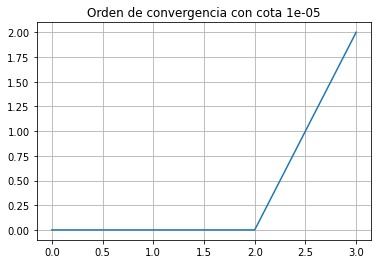

In [ ]:
iteraciones_7 = calcular_orden_de_convergencia(iteraciones_7)
graficar_orden_de_convergencia(iteraciones_7, 1e-5)

Como se tienen pocas iteraciones, se observa solo un valor de orden de convergencia, que es 2. Esto se corresponde con la teoría, pues se trata de un método de convergencia cuadrática. Ahora calculamos y graficamos los valores de constante asintótica:

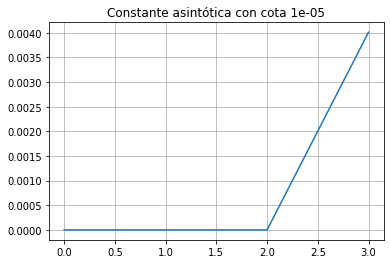

In [ ]:
iteraciones_7 = calcular_constante_asintotica(iteraciones_7)
graficar_constante_asintotica(iteraciones_7, 1e-5)

Se puede observar que el método reduce su error en, aproximadamente, $0.0040$ veces, ya que se trata de uno de los métodos más efectivos para la búsqueda de raíces.

Mostramos la tabla de iteraciones, con cada raíz, error, convergencia y constante asintótica:

In [ ]:
df_7 = mostrar_iteraciones(iteraciones_7)
df_7

,raiz,error,convergencia,constante_asintótica
iteracion,,,,
1,1172.727272727272726515757029,77.272727272727273484242971,0,0
2,1149.764220199333251407036942,22.963052527939475108720087,0,0
3,1147.614830185133663519126807,2.149390014199587887910135,0,0
4,1147.596289910163036356634211,0.018540274970627162492596,2.000597396704144504995780096,0.004011318930814550450867175647
5,1147.596288534586012674197705,0.000001375577023682436506,2.000597396704144504995780096,0.004011318930814550450867175647


Ahora graficamos $log_{10}({\Delta x})$ vs. iteraciones para visualizar el comportamiento de la constante asintótica y el orden de convergencia.

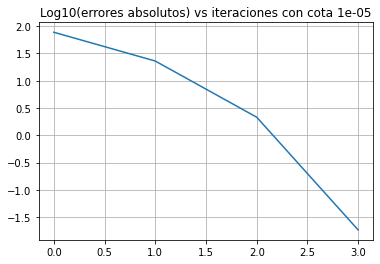

In [ ]:
graficar_log_cota(iteraciones_7, 1e-5)

Este gráfico tiene un comportamiento muy similar al del método de la Secante, lo cual tiene sentido porque se trata de dos métodos similares.

Realizamos los mismos pasos, pero esta vez con la cota $1 \times 10^{-13}$.

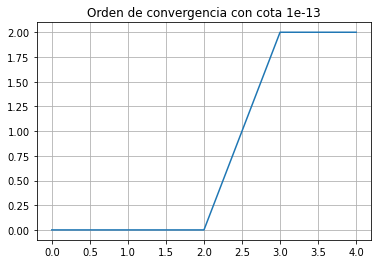

In [ ]:
iteraciones_8 = calcular_orden_de_convergencia(iteraciones_8)
graficar_orden_de_convergencia(iteraciones_8, 1e-13)

Ocurre lo mismo que antes, solo que en este caso se tiene una iteración más, por lo que se nota que el valor de convergencia queda constante en aproximadamente 2.

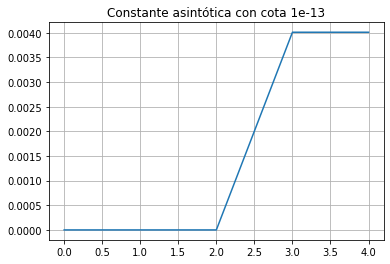

In [ ]:
iteraciones_8 = calcular_constante_asintotica(iteraciones_8)
graficar_constante_asintotica(iteraciones_8, 1e-13)

Vemos un resultado prácticamente igual al anterior, ya que la reducción de la cota solo produjo una iteración extra, que no varió el pico de la constante asintótica.

In [ ]:
df_8 = mostrar_iteraciones(iteraciones_8)
df_8

,raiz,error,convergencia,constante_asintótica
iteracion,,,,
1,1172.727272727272726515757029,77.272727272727273484242971,0,0
2,1149.764220199333251407036942,22.963052527939475108720087,0,0
3,1147.614830185133663519126807,2.149390014199587887910135,0,0
4,1147.596289910163036356634211,0.018540274970627162492596,2.000597396704144504995780096,0.004011318930814550450867175647
5,1147.596288534586012674197705,0.000001375577023682436506,2.000597396704144504995780096,0.004011318930814550450867175647
6,1147.596288534586005102186628,7.572011077E-15,2.000597396704144504995780096,0.004011318930814550450867175647


Ahora graficamos $log_{10}({\Delta x})$ vs. iteraciones para visualizar el comportamiento de la constante asintótica y el orden de convergencia.

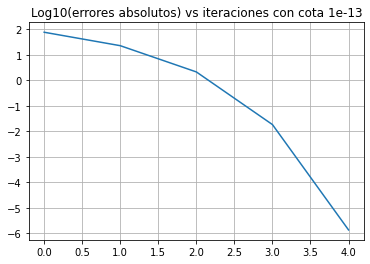

In [ ]:
graficar_log_cota(iteraciones_8, 1e-13)

Los resultados obtenidos son prácticamente los mismos que con la cota $1 \times 10^{-5}$.

##### $\textrm{Newton - Raphson modificado}$

A diferencia de Newton-Raphson, en este metodo utilizamos la derivada segunda de $f(x)$. La fórmula usada es la siguiente:

$ x_{i+1} = x_i - \frac {f(x_i)f'(x_i)} {[f'(x_i)]^2-f(x_i)f''(x_i)} $

Utilizamos el mismo intervalo y la misma semilla que con el método tradicional de Newton-Raphson.

In [ ]:
semilla = Decimal(1250)
cota_1 = Decimal(1e-5)
cota_2 = Decimal(1e-13)
max_iteraciones = 100

iteraciones_9 = []
NewtonRaphsonModificado(semilla, cota_1, iteraciones_9, max_iteraciones)

iteraciones_10 = []
NewtonRaphsonModificado(semilla, cota_2, iteraciones_10, max_iteraciones)

print("Con cota 1e-5:", len(iteraciones_9), "iteraciones.\nCon cota 1e-13:", len(iteraciones_10), "iteraciones.")

Con cota 1e-5: 5 iteraciones.
Con cota 1e-13: 6 iteraciones.


Calculamos y graficamos la constante asintótica para la cota $1 \times 10^{-5}$:

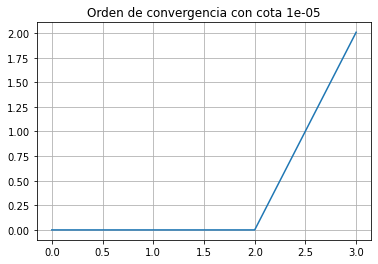

In [ ]:
iteraciones_9 = calcular_orden_de_convergencia(iteraciones_9)
graficar_orden_de_convergencia(iteraciones_9, 1e-5)

Al igual que con el método anterior, al ser cuadrático, el valor de orden de convergencia es 2. Vemos a continuación el gráfico de la constante asintótica:

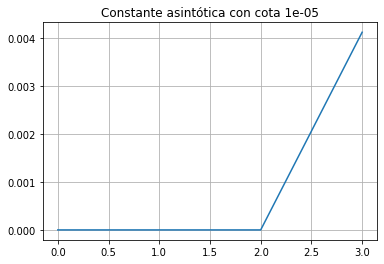

In [ ]:
iteraciones_9 = calcular_constante_asintotica(iteraciones_9)
graficar_constante_asintotica(iteraciones_9, 1e-5)

Vemos un ligero aumento en el error respecto al método tradicional mostrado anteriormente, a pesar de que en este método se utiliza la derivada segunda, que podría lograr meyor precisión. Quizás esto ocurre porque el método modificado es utilizado para la búsqueda de raíces múltiples, cosa que no estamos haciendo en este caso. Esta vez, el error se reduce en $0.0041$ veces, aproximadamente. Esto se ve a continuación la tabla de iteraciones:

In [ ]:
df_9 = mostrar_iteraciones(iteraciones_9)
df_9

,raiz,error,convergencia,constante_asintótica
iteracion,,,,
1,1122.615803814713894400656077,127.384196185286105599343923,0,0
2,1144.754462727881170463178403,22.138658913167276062522326,0,0
3,1147.563487456035117915633556,2.809024728153947452455153,0,0
4,1147.596284228406022342666411,0.032796772370904427032855,2.008428527750586812451852683,0.004120399424692300402790839278
5,1147.596288534585930898449390,0.000004306179908555782979,2.008428527750586812451852683,0.004120399424692300402790839278


Ahora graficamos $log_{10}({\Delta x})$ vs. iteraciones para visualizar el comportamiento de la constante asintótica y el orden de convergencia.

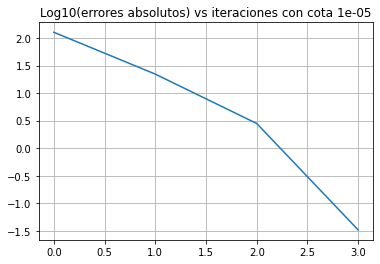

In [ ]:
graficar_log_cota(iteraciones_9, 1e-5)

Vemos un resultado muy similar al del método original.

Realizamos los mismos pasos, pero esta vez con la constante $1 \times 10^{-13}$:

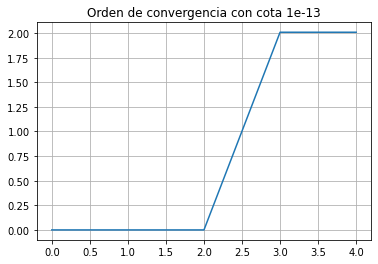

In [ ]:
iteraciones_10 = calcular_orden_de_convergencia(iteraciones_10)
graficar_orden_de_convergencia(iteraciones_10, 1e-13)

Ocurre lo mismo que con el método original para esta cota.

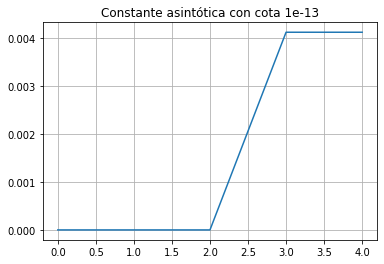

In [ ]:
iteraciones_10 = calcular_constante_asintotica(iteraciones_10)
graficar_constante_asintotica(iteraciones_10, 1e-13)

Se observan resultados prácticamente iguales a los de la cota anterior, ya que solamente se añade una iteración. A continuación vemos la tabla de iteraciones:

In [ ]:
df_10 = mostrar_iteraciones(iteraciones_10)
df_10

,raiz,error,convergencia,constante_asintótica
iteracion,,,,
1,1122.615803814713894400656077,127.384196185286105599343923,0,0
2,1144.754462727881170463178403,22.138658913167276062522326,0,0
3,1147.563487456035117915633556,2.809024728153947452455153,0,0
4,1147.596284228406022342666411,0.032796772370904427032855,2.008428527750586812451852683,0.004120399424692300402790839278
5,1147.596288534585930898449390,0.000004306179908555782979,2.008428527750586812451852683,0.004120399424692300402790839278
6,1147.596288534586005102186628,7.4203737238E-14,2.008428527750586812451852683,0.004120399424692300402790839278


En general, vemos que Newton-Raphson modificado no tiene una variación muy grande respecto al método de Newton-Raphson. Esto podría ocurrir porque el método modificado es más adecuado para la búsqueda de raíces múltiples. Si ese fuera el caso, observaríamos una mayor diferencia entre ambos métodos.

Ahora graficamos $log_{10}({\Delta x})$ vs. iteraciones para visualizar el comportamiento de la constante asintótica y el orden de convergencia.

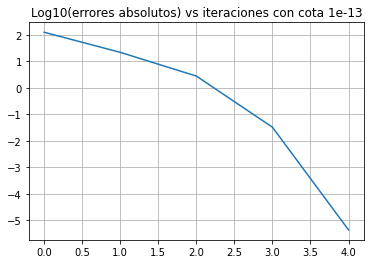

In [ ]:
graficar_log_cota(iteraciones_10, 1e-13)

En este caso el gráfico se ve prácticamente igual al del método original con la misma cota.

Los resultados se corresponden bastante con la teoría, como debería ser. Por ejemplo, vemos que el método de Bisección es el método que menos reduce su error (lo hace en $0.5$), ya que se trata de el método más simple de los vistos en la materia. Por otra parte, vemos que los métodos cuadráticos (Newton-Raphson y Newton-Raphson modificado) predominan en cuanto a la obtención de la raíz más cercana a la real, y por consecuente, en cuanto a la reducción del error, logrando reducirlo en hasta $0.004011318930814550450867175647$ veces. Se debe mencionar también al método de la Secante, el cual logró reducir el error considerablemente en comparación al método de Bisección por ejemplo, siendo esto esperable ya que se trata de un método supralineal.

#### $\textrm{Analisis del conjunto de metodos}$

Respondiendo el ítem $b)$, dado los resultados obtenidos por los métodos utilizados, se puede concluir que la cantidad de kilogramos del producto $E41$ a fabricar para cumplir la contribucion mensual de $\$25.000$ es de $1147.51147.59628853458601\pm 8\times 10^{-15}$, utilizando el método de Newton-Raphson con cota de error $1\times 10^{-13}$. \\
Es decir: \\
$(1147.59628853458601\pm 0.000000000000008)kg$

Ahora se realizará el grafico de la convergencia y la constante asintótica de todos los metodos juntos, a modo de comparación

##### $\textrm{Orden de convergencia conjunta}$


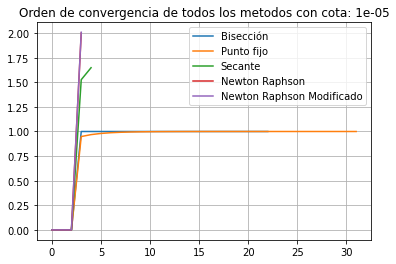

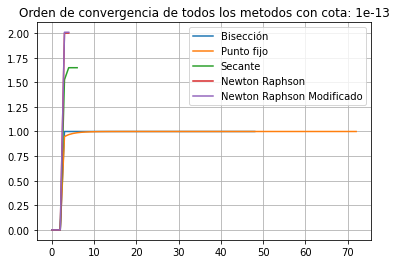

In [ ]:
graficar_orden_de_convergencia_conjunta(iteraciones_1, iteraciones_3, iteraciones_5, iteraciones_7, iteraciones_9, 1e-5)
graficar_orden_de_convergencia_conjunta(iteraciones_2, iteraciones_4, iteraciones_6, iteraciones_8, iteraciones_10, 1e-13)

##### $\textrm{Constante asintotica conjunta}$

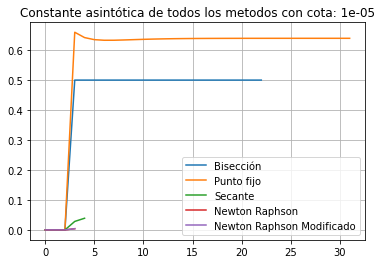

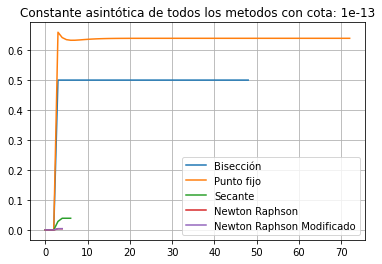

In [ ]:
graficar_constante_asintotica_conjunta(iteraciones_1, iteraciones_3, iteraciones_5, iteraciones_7, iteraciones_9, 1e-5)
graficar_constante_asintotica_conjunta(iteraciones_2, iteraciones_4, iteraciones_6, iteraciones_8, iteraciones_10, 1e-13)

No se podria obtener una conclusión certera de los gráficos dado que, según la teoría, el orden de convergencia se obtiene con infinitas iteraciones lo cual una computadora no puede llegar a procesar.

A continuación realizamos el gráfico conjunto de $log_{10}(error)$ vs iteraciones para cada cota:

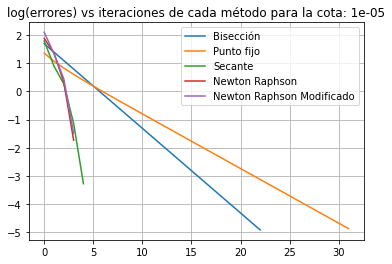

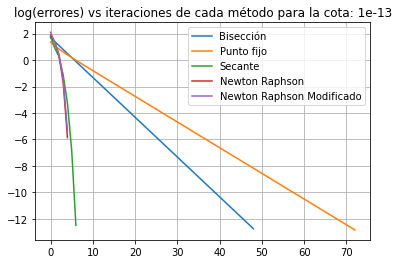

In [ ]:
graficar_log_error_vs_iteraciones(iteraciones_1, iteraciones_3, iteraciones_5, iteraciones_7, iteraciones_9, 1e-5)
graficar_log_error_vs_iteraciones(iteraciones_2, iteraciones_4, iteraciones_6, iteraciones_8, iteraciones_10, 1e-13)

Como podemos observar, los métodos de Secante, Newton-Raphson y Newton-Raphson modificado necesitan bastantes menos iteraciones para reducir considerablemente el error que los de Bisección y Punto fijo, que son métodos de convergencia lineal. Además, se ve que a medida que avanzan las iteraciones, la diferencia entre los errores de cada iteración se reduce cada vez más, y, por ende, el resultado cambia cada vez menos. Estos resultados se corresponden con la teoría.

##### $\textrm{Conclusion final}$



Como se pudo ver durante todo el desarrollo, el **metodo de Newton-Raphson** y el de **Newton-Raphson modificado** son los metodos que mas rapido convergen a un resultado dadas las cotas impuestas. Sin embargo, estos metodos requieren conocer tanto la primera derivada (NR y NR modificado) como la segunda derivada de la funcion (NR modificado), lo cual no siempre se puede obtener de las funciones. Ademas esto ultimo hace que estos metodos tengan un alto costo computacional.

En ese sentido, dichos métodos presentan una desventaja frente a otros, como el de la Secante, el cual también converge de forma acelerada pero no tanto como los metodos antes mencionados; o también del metodo de Bisección el cual siempre converge.

##**2.** $\textrm{Interpolacion por Spline}$


$\textrm{La tabla 1 contiene las muestras obtenidas de las 3 curvas mostrada en la figura 2.1.}$
$\textrm{Se desea interpolar dichas muestras utilizando 3 splines con frontera ligada.}$
$\textrm{Se deben desarrollar los siguientes puntos:}$

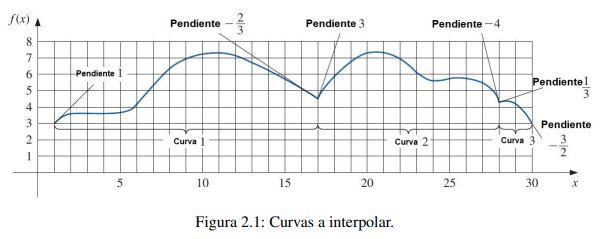

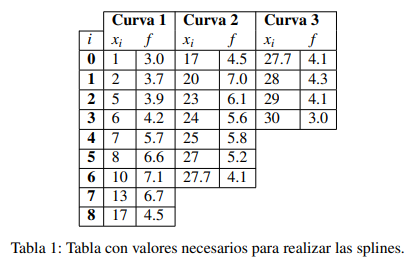

###$\quad$ **a)** $\textrm{Plantear el problema de interpolacion con Spline con frontera ligada.}$ $\textrm{Asuma que los coeficientes de los terminos independientes, lineales}$ $\textrm{cuadraticos y cubicos son de la forma } a_i, b_i, c_i, d_i, \textrm{respectivamente.}$

La forma más común de aproximar polinomialmente por tramos es la **interpolación de Spline Cúbico**.

**Condiciones**

Dada la función _$f$_ definida en $\begin{bmatrix}a, & b\end{bmatrix}$ y el conjunto de nodos $a = x_0 < x_1< \dots < x_n = b$, las condiciones que se deben cumplir para construir un spline cubico $S$ para _$f$_ son: 
  
\begin{aligned}
&i. &&  S_j(x) \textrm{ es un polinomio cubico en el subintervalo} \begin{bmatrix}x_j,&x_{j+1} \end{bmatrix} &\textrm{ para cada } j = 0, 1, \dots, n-1;\\
&ii. && S_j(x_j) = f(x_j) \quad  y \quad S_j(x_{j+1}) = f(x_{j+1}) &\textrm{ para cada } j = 0, 1, \dots, n-1;\\
&iii. && S_{j+1}(x_{j+1}) = S_j(x_{j+1}) &\textrm{ para cada } j = 0, 1, \dots, n-2;\\
&iv. && S'_{j+1}(x_{j+1}) = S_j'(x_{j+1}) &\textrm{ para cada } j = 0, 1, \dots, n-2;\\
&v.  && S''_{j+1}(x_{j+1}) = S''_j(x_{j+1}) &\textrm{ para cada } j = 0, 1, \dots, n-2;\\
&vi.  && S'(x_0) = f'(x_0) \quad  y \quad S'(x_n) = f'(x_n).\\
\end{aligned}

El conjunto de condiciones garantizan no solo que el interpolante es continuamente diferenciable en el intervalo, sino también que tiene una segunda derivada continua. Aún así, no supone que las derivadas del interpolante concuerdan con las de la función en su aproximación, incluso en los nodos. 

La última condición se debe a que se construirá un Spline Cúbico cuya frontera es ligada. Al trabajar con una frontera de este tipo, se obtendrá una aproximación más precisa que al trabajar con frontera natural.

Construir un spline de frontera ligada solo es posible si se cuenta con el valor de la derivada en los extremos de _$f$_. De no poseer esta información, se tendría que construir un Spline de frontera natural. En ese caso, la condición $vi.$ sería: 
$$vi. \quad  S''(x_0) = S''(x_n) = 0.$$



**Condición $i.$**

Para construir el spline cúbico $S$ que se interpola para la función $f$, las condiciones anteriormente mencionadas se aplican a los polinomios cúbicos
$$S_j(x) = a_j + b_j (x-x_j) + c_j (x-x_j)^2 + d_j (x-x_j)^3$$ 

cada uno en el subintervalo $\begin{bmatrix}x_j, & x_{j+1}\end{bmatrix}$ para cada $j = 0, 1, \dots, n-1$, siendo $n =$ cantidad de nodos$ - 1$.

Como se puede apreciar, para cada $S_j(x)$ será necesario determinar 4 constantes. Es decir, para construir un spline definido en un intervalo que se ha subdividido en $n$ subintervalos se tendrán que determinar $4n$ constantes.

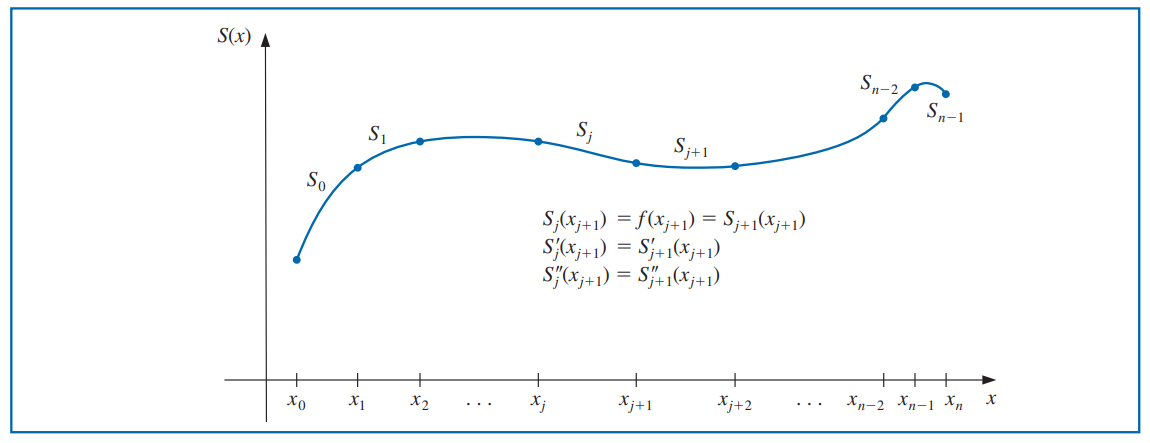

### $\quad$**b)** $\textrm{Mostrar las ecuaciones que permiten obtener los coeficientes de las 3 splines.}$  

### $\textrm{En particular, obtenga el sistema lineal de la forma }$ $A·x = b,$ $\textrm{ donde}$ $x$ $\textrm{es el vector de coeficientes correspondientes a los terminos cuadraticos de dichas splines.}$

### $\textrm{Es decir, }$ $x = \begin{bmatrix} c_0 & c_1 & c_2 & \dots \end{bmatrix}^T.$ 

Se tienen $n$ curvas de la forma $S_j(x) = a_j + b_j(x-x_j) + c_j(x-x_j)^2 + d_j(x-x_j)^3$ para cada $j = 0, 1, \dots, n-1$.

Se tienen, entonces, $4n$ constantes a determinar. Para eso, se recurren a las condiciones planteadas anteriormente.

#### $\textrm{Condicion $ii.$}$



Para empezar, los splines deben concordar con los datos en los nodos. Se plantean las siguientes dos ecuaciones generales:

- $S_j(x_j) = f(x_j)$

Se plantea la primera parte:

\begin{aligned}
S_j(x_j) &= a_j + b_j(x_j-x_j) + c_j(x_j-x_j)^2 + d_j(x_j-x_j)^3 \\
&= a_j + b_j(0) + c_j(0)^2 + d_j(0)^3 \\
&= a_j
\end{aligned}

Y a su vez, esto es igual a $f(x_j)$. Por ende,

$ \quad \Rightarrow \quad S_j(x_j) = a_j = f(x_j) $ para cada $j = 0, 1, \dots, n-1.$

- $S_j(x_{j+1}) = f(x_{j+1})$

Se plantea la primera parte:

$$S_j(x_{j+1}) = a_j + b_j(x_{j+1}-x_j) + c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3$$

Y a su vez, esto es igual a $f(x_{j+1})$. Por ende,

$ \quad \Rightarrow \quad S_j(x_{j+1}) = a_j + b_j(x_{j+1}-x_j) + c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3 = f(x_{j+1})$ para cada $j = 0, 1, \dots, n-1.$

#### $\textrm{Condicion $iii.$}$



Se sabe, además, que las curvas deben coincidir en los bordes:
$$S_{j+1}(x_{j+1}) = S_j(x_{j+1})$$

Con el planteo anterior se concluyó que $S_{j+1}(x_{j+1}) = a_{j+1}$, y que además $S_j(x_{j+1}) = a_j + b_j(x_{j+1}-x_j) + c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3$.

Se puede decir entonces que:

$ \quad \Rightarrow \quad a_{j+1} = S_{j+1}(x_{j+1}) = S_j(x_{j+1}) = a_j + b_j(x_{j+1}-x_j)+c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3$ para cada $j = 0, 1, \dots, n-2.$


#### $\textrm{Condicion $iv$.}$



Se plantea la igualdad de las derivada de primer orden de las curvas en los bordes:
$$S'_{j+1}(x_{j+1}) = S_j'(x_{j+1})$$

Se desarrolla:

\begin{aligned}
S'_{j+1}(x_{j+1}) &= b_{j+1} + 2c_{j+1}(x_{j+1}-x_{j+1})+3d_{j+1}(x_{j+1}-x_{j+1})^2 \\
&= b_{j+1} + 2c_{j+1}(0)+3d_{j+1}(0)^2 \\
&= b_{j+1}
\end{aligned}

Entonces, $S'_{j+1}(x_{j+1}) = b_{j+1}$.

A su vez:

\begin{aligned}
S'_j(x_{j+1}) &= b_j + 2c_j(x_{j+1}-x_j)+3d_j(x_{j+1}-x_j)^2
\end{aligned}

Se concluye entonces:

$ \quad \Rightarrow \quad b_{j+1} = b_j + 2c_j(x_{j+1}-x_j)+3d_j(x_{j+1}-x_j)^2$ para cada $j = 0, 1, \dots, n-1.$

#### $\textrm{Condicion $v.$}$



Se plantea la igualdad de la derivada de segundo orden de las curvas en los bordes:
$$S''_{j+1}(x_{j+1}) = S_j''(x_{j+1})$$

Se desarrolla:

\begin{aligned}
S''_{j+1}(x_{j+1}) &= 2c_{j+1} + 6d_{j+1}(x_{j+1}-x_{j+1})\\
&= 2c_{j+1} + 6d_{j+1}(0)\\
&= 2c_{j+1}
\end{aligned}

Entonces, $S''_{j+1}(x_{j+1}) = 2c_{j+1}$.

A su vez:

\begin{aligned}
S''_j(x_{j+1}) &= 2c_j + 6d_j(x_{j+1}-x_j)
\end{aligned}

Se plantea la igualdad: $2c_{j+1} = 2c_j + 6d_j(x_{j+1}-x_j)$.

Se despeja $c_{j+1}$

$ \quad \Rightarrow \quad c_{j+1} = c_j + 3d_j(x_{j+1}-x_j)$ para cada $j = 0, 1, \dots, n-1.$

#### $\textrm{Pasaje en limpio de las ecuaciones}$

Se pasan en limpio las ecuaciones previamente obtenidas, las cuales permiten la construcción de un Spline Cúbico genérico, ya que aún no han sido aplicadas las condiciones de borde.

Se pasa en limpio lo obtenido a partir de las **condiciones** $iii.$, $iv.$ y $v.$:

> **($1$)** $\quad a_{j+1} = a_j + b_j(x_{j+1}-x_j)+c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3$
>
> **($2$)** $\quad b_{j+1} = b_j + 2c_j(x_{j+1}-x_j)+3d_j(x_{j+1}-x_j)^2$
>
> **($3$)** $\quad c_{j+1} = c_j + 3d_j(x_{j+1}-x_j)$

Se resuelve el sistema buscando que quede todo en funcion de $\{c_j\}_{j = 0}^n$.

Se despeja $d_j$ de **($3$)**
> $d_j = \frac{(c_{j+1} - c_j)}{3(x_{j+1}-x_j)}$

Se procede a reemplazar $d_j$ en **($1$)** y **($2$)**.

- Se reemplaza $d_j$ en **($1$)**

\begin{aligned}
a_{j+1} &= a_j + b_j(x_{j+1}-x_j) + c_j(x_{j+1}-x_j)^2 + \frac{(c_{j+1} - c_j)}{3(x_{j+1}-x_j)}(x_{j+1}-x_j)^3 \\
&= a_j + b_j(x_{j+1}-x_j) + c_j(x_{j+1}-x_j)^2 + \frac{(c_{j+1} - c_j)(x_{j+1}-x_j)^2}{3} \\
&= a_j + b_j(x_{j+1}-x_j) + \frac{(3c_j + c_{j+1} - c_j)(x_{j+1}-x_j)^2}{3} \\
&= a_j + b_j(x_{j+1}-x_j) + \frac{(2c_j + c_{j+1})(x_{j+1}-x_j)^2}{3} \\
\end{aligned}

Se agrega una nueva ecuación:

> **($4$)** $\quad a_{j+1} = a_j + b_j(x_{j+1}-x_j) + \frac{(2c_j + c_{j+1})(x_{j+1}-x_j)^2}{3}.$

- Ahora se reemplaza $d_j$ en **($2$)**

\begin{aligned}
b_{j+1} &= b_j + 2c_j(x_{j+1}-x_j)+3\frac{(c_{j+1} - c_j)}{3(x_{j+1}-x_j)}(x_{j+1}-x_j)^2 \\
&= b_j + 2c_j(x_{j+1}-x_j) + (c_{j+1} - c_j)(x_{j+1}-x_j) \\
&= b_j + (2c_j + c_{j+1} - c_j)(x_{j+1}-x_j) \\
&= b_j + (c_j + c_{j+1})(x_{j+1}-x_j) \\
\end{aligned}

A esta ecuación, se le reduce en $1$ el índice:

> **($5$)** $\quad b_{j} = b_{j-1} + (c_{j-1} + c_j)(x_j-x_{j-1}).$

Se despeja $b_j$ de **($4$)**

> **($6$)** $\quad b_j = \frac{a_{j+1}-a_j}{x_{j+1}-x_j} - \frac{(x_{j+1}-x_j)(2c_j + c_{j+1})}{3}$

Y se reduce en $1$ el índice, tal que

> **($7$)** $\quad b_{j-1} = \frac{a_j-a_{j-1}}{x_j-x_{j-1}} - \frac{(x_j-x_{j-1})(2c_{j-1} + c_j)}{3}$


Ahora, a partir de lo obtenido en **($6$)** y **($7$)**, se reescribe **($5$)**.

\begin{aligned}
b_j &= b_{j-1} + (c_{j-1} + c_j)(x_j-x_{j-1}) \\
\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - \frac{(x_{j+1}-x_j)(2c_j + c_{j+1})}{3} &= \frac{a_j-a_{j-1}}{x_j-x_{j-1}} - \frac{(x_j-x_{j-1})(2c_{j-1} + c_j)}{3} + (c_{j-1} + c_j)(x_j-x_{j-1}) \\
\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - \frac{a_j-a_{j-1}}{x_j-x_{j-1}} &= \frac{(x_j-x_{j-1})(-2c_{j-1} - c_j)}{3} + (c_{j-1} + c_j)(x_j-x_{j-1}) + \frac{(x_{j+1}-x_j)(2c_j + c_{j+1})}{3}\\
3\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - 3\frac{a_j-a_{j-1}}{x_j-x_{j-1}} &= (x_j-x_{j-1})(-2c_{j-1} - c_j) + 3(c_{j-1} + c_j)(x_j-x_{j-1}) + (x_{j+1}-x_j)(2c_j + c_{j+1})\\
3\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - 3\frac{a_j-a_{j-1}}{x_j-x_{j-1}} &= (x_j-x_{j-1})(c_{j-1} + 2c_j)+ (x_{j+1}-x_j)(2c_j + c_{j+1})\\
3\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - 3\frac{a_j-a_{j-1}}{x_j-x_{j-1}} &= (x_j-x_{j-1})c_{j-1} + (x_j-x_{j-1})2c_j+ (x_{j+1}-x_j)2c_j + (x_{j+1}-x_j)c_{j+1}\\
\end{aligned}

para $j = 1, 2, \dots, n - 1$ .

Se obtiene entonces una nueva ecuación:

> **($8$)** $\quad (x_j-x_{j-1})c_{j-1} + 2c_j[(x_j-x_{j-1}) + (x_{j+1}-x_j)] + (x_{j+1}-x_j)c_{j+1} = 3\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - 3\frac{a_j-a_{j-1}}{x_j-x_{j-1}}$

Esta ecuación tiene como incógnitas los $\{c_j\}^n_{j = 0}$, dado que tanto $a_j$ como $x_j$ ya fueron encontrados previamente.

#### $\textrm{Condicion $vi.$}$

Se imponen, finalmente, las condiciones de frontera.


- $S_0'(x_0) = f'(x_0)$

Se plantea la primera parte:

\begin{aligned}
S'_0(x_0) &= b_0 + 2c_0(x_0-x_0) + 3d_0(x_0-x_0)^2 \\
&= b_0 + 2c_0(0) + 3d_0(0)^2 \\
&= b_0
\end{aligned}

Y a su vez, esto es igual a $f'(x_0)$. Por ende,

$ \quad \Rightarrow \quad S_0'(x_0) = b_0 = f'(x_0).$

Se reemplaza lo obtenido en **($6$)** con $j = 0$ y se obtiene:

\begin{aligned}
f'(x_0) &= \frac{a_1-a_0}{x_1-x_0} - \frac{(x_1-x_0)(2c_0 + c_1)}{3}\\
3f'(x_0) &= 3\frac{a_1-a_0}{x_1-x_0} - (x_1-x_0)(2c_0 + c_1)\\
3f'(x_0) &= 3\frac{a_1-a_0}{x_1-x_0} - (x_1-x_0)2c_0 - (x_1-x_0)c_1\\
\end{aligned}

Se obtiene entonces la siguiente ecuación:

> **($9$)** $\quad 2(x_1-x_0)c_0 +(x_1-x_0)c_1 = 3\frac{a_1-a_0}{x_1-x_0} - 3f'(x_0)$

- $S_{n-1}'(x_n) = f'(x_n)$

Se plantea la primera parte:

$$S_{n-1}'(x_n) = b_{n-1} + 2c_{n-1}(x_n-x_{n-1}) + 3d_{n-1}(x_n-x_{n-1})^2$$

Y anteriormente se obtuvo que
$$d_j = \frac{(c_{j+1} - c_j)}{3(x_{j+1}-x_j)}$$

Por ende, 

\begin{aligned}
S_{n-1}'(x_3) &= b_{n-1} + 2c_{n-1}(x_n-x_2) + 3\frac{c_n - c_{n-1}}{3(x_n-x_{n-1})}(x_n-x_2)^2 \\
&= b_{n-1} + 2c_{n-1}(x_n-x_{n-1}) + (c_n - c_{n-1})(x_n-x_{n-1}) \\
&= b_{n-1} + (c_{n-1} + c_n)(x_n-x_{n-1})
\end{aligned}

Y a su vez, esto es igual a $f'(x_n)$. Por ende,

$ \quad \Rightarrow \quad S_{n-1}'(x_n) = b_{n-1} + (c_{n-1} + c_n)(x_n-x_{n-1}) = f'(x_n).$

Se despeja $b_{n-1}$:

$$b_{n-1} + (c_{n-1} + c_n)(x_n-x_{n-1}) = f'(x_n)$$
$$b_{n-1} = f'(x_n) - (c_{n-1} + c_n)(x_n-x_{n-1})$$

Se reemplaza $b_{n-1}$ en **($6$)** con $j = (n-1)$ y se obtiene:

\begin{aligned}
f'(x_n) - (c_{n-1} + c_n)(x_n-x_{n-1}) &= \frac{a_n-a_{n-1}}{x_n-x_{n-1}} - \frac{(x_n-x_{n-1})(2c_{n-1} + c_n)}{3}\\
f'(x_n) &= \frac{a_n-a_{n-1}}{x_n-x_{n-1}} + \frac{(x_n-x_{n-1})(-2c_{n-1} - c_n)}{3} + (c_{n-1} + c_n)(x_n-x_{n-1})\\
f'(x_n) &= \frac{a_n-a_{n-1}}{x_n-x_{n-1}} + \frac{(x_n-x_{n-1})(-2c_{n-1} - c_n + 3c_{n-1} + 3c_n)}{3}\\
f'(x_n) &= \frac{a_n-a_{n-1}}{x_n-x_{n-1}} + \frac{(x_n-x_{n-1})(c_{n-1} + 2c_n)}{3}\\
3f'(x_n) &= 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}} + (x_n-x_{n-1})c_{n-1} + (x_n-x_{n-1})2c_n\\
\end{aligned}


Se obtiene entonces la siguiente ecuación:

> **($10$)** $\quad (x_n-x_{n-1})c_{n-1} + 2(x_n-x_{n-1})c_n = 3f'(x_n) - 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}}$

#### $\textrm{Sistema Lineal}$

Se juntan las ecuaciones **($9$)**, **($8$)** y **($10$)**. Es decir,

- $2(x_1-x_0)c_0 +(x_1-x_0)c_1 = 3\frac{a_1-a_0}{x_1-x_0} - 3f'(x_0).$
- $(x_j-x_{j-1})c_{j-1} + 2c_j[(x_j-x_{j-1}) + (x_{j+1}-x_j)] + (x_{j+1}-x_j)c_{j+1} = 3\frac{a_{j+1}-a_j}{x_{j+1}-x_j} - 3\frac{a_j-a_{j-1}}{x_j-x_{j-1}} \quad$ para cada $j = 0, 1, \dots, n-1.$
- $(x_n-x_{n-1})c_{n-1} + 2(x_n-x_{n-1})c_n = 3f'(x_n) - 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}}.$ 

Y se plantea el siguiente sistema lineal: 

$$
  \left\{ \begin{array}{lcc}
              2(x_1-x_0) c_0 +(x_1-x_0)c_1 = 3\frac{a_1-a_0}{x_1-x_0} - 3f'(x_0) \\
              (x_1-x_0) c_0 + 2[(x_1-x_0) + (x_2-x_1)] c_1 + (x_2-x_1) c_2 = 3\frac{a_2-a_1}{x_2-x_1} - 3\frac{a_1-a_0}{x_1-x_0} \\
              (x_2-x_1) c_1 + 2[(x_2-x_1) + (x_3-x_2)] c_2 + (x_3-x_2)c_3 = 3\frac{a_3-a_2}{x_3-x_2} - 3\frac{a_2-a_1}{x_2-x_1} \\
              \quad\dots \\
              (x_{n-1}-x_{n-2}) c_{n-2} + 2[(x_{n-1}-x_{n-2}) + (x_n-x_{n-1})] c_{n-1} + (x_n-x_{n-1})c_n = 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}} - 3\frac{a_{n-1}-a_{n-2}}{x_{n-1}-x_{n-2}} \\
              (x_n-x_{n-1}) c_{n-1} + 2(x_n-x_{n-1}) c_n = 3f'(x_n) - 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}}
          \end{array}
  \right.
$$

Se coloca la información en las matrices A y b, para así resolver el sistema lineal de ecuaciones $Ax = b$.

$A$ resulta en la matriz

$$\begin{bmatrix}
    2(x_1-x_0) & (x_1-x_0) & 0 & \dots & \dots & \dots & 0\\
  (x_1-x_0) & 2[(x_1-x_0)+(x_2-x_1)] & (x_2-x_1) &0 & \dots & \dots & 0\\
    0 & (x_2-x_1) &  2[(x_2-x_1)+(x_3-x_2)] & (x_3-x_2) &0 & \dots & 0\\
    \dots&\dots&\dots&\dots&\dots&\dots & \dots\\
    0 & \dots& \dots & 0 & (x_{n-1}-x_{n-2}) & 2[(x_{n-1}-x_{n-2})+(x_n-x_{n-1})] & (x_n - x_{n-1}) \\
    0 & \dots & \dots &\dots & 0 & (x_n-x_{n-1}) & 2(x_n-x_{n-1})
  \end{bmatrix}
$$ 

  $$b = \begin{bmatrix}
  3\frac{a_1-a_0}{x_1-x_0} - 3f'(x_0) \\
  3\frac{a_2-a_1}{x_2-x_1} - 3\frac{a_1-a_0}{x_1-x_0} \\
  3\frac{a_3-a_2}{x_3-x_2} - 3\frac{a_2-a_1}{x_2-x_1} \\
  \dots \\
  3\frac{a_n-a_{n-1}}{x_n-x_{n-1}} - 3\frac{a_{n-1}-a_{n-2}}{x_{n-1}-x_{n-2}} \\
  3f'(x_n) - 3\frac{a_n-a_{n-1}}{x_n-x_{n-1}}
  \end{bmatrix},$$

  $$x = \begin{bmatrix}
  c_0 \\
  c_1 \\
  c_2 \\
  \vdots\\
  c_{n-1}\\
  c_n
  \end{bmatrix}.$$

   

### $\quad$**c)** $\textrm{Desarrollar el seudocodigo del algoritmo de interpolacion con Spline ligada}$ $\textrm{en base a lo explicado en los dos puntos anteriores}.$

In [ ]:
from sympy import *
init_printing(use_unicode=True)
import numpy as np

#### $\textrm{Implementacion - Forma 1}$

A partir de lo concluído previamente, se propone la siguiente implementación para hallar el polinomio interpolante.


Se cuenta con la clase **SplineCubico**, la cual se inicializa con $4$ valores:
- $nodos:$ la coordenada "$x$" de los puntos a interpolar.
- $imagen\_nodos:$ la coordenada "$y$" de los puntos a interpolar.
- $fpo:$ la derivada primera de $f(x_0)$.
- $fpn:$ la derivada primera de $f(x_n)$. 

Para generar el spline, se llama al método $construir\_spline\_cubico()$. Éste devuelve los coeficientes $a$, $b$, $c$ y $d$.

En caso de querer visualizar los $S_j$, se invoca el método $obtener\_Sj$ enviándole como parámetro el _j_ a utilizar.

Y finalmente, en caso de querer visualizar todos los $S_j$, se utiliza el método $obtener\_todos\_los\_Sj().$

In [ ]:
class SplineCubico():
  
  #Se inicializa un interpolador cuyos atributos son:
  # • nodos: la coordenada "x" de los puntos a interpolar.
  # • imagen_nodos: la coordenada "y" de los puntos a interpolar.
  # • fpo: la derivada primera de f(x0).
  # • fpn: la derivada primera de f(xn).
  def __init__(self, nodos, imagen_nodos, fpo, fpn):

    self.a = imagen_nodos
    self.x = nodos
    self.n = len(nodos)

    self.fpo = fpo
    self.fpn = fpn

    self.b = [None] * (self.n-1)
    self.c = [None] * (self.n)
    self.d = [None] * (self.n-1)

    #uso h_j = x_{j+1} - x_j para facilitar la notación
    self.h = [None] * (self.n - 1)
    for i in range(self.n - 1):
      self.h[i] = self.x[i+1] - self.x[i]

  def construir_A(self):
    
    #Matriz de 0s
    A = zeros(self.n)

    #Primera fila
    A[0,0] = 2*self.h[0]
    A[0,1] = self.h[0]

    #Resto de filas menos la última
    for i in range(self.n-2):
      A[i+1,i] = self.h[i]
      A[i+1,i+1] = 2*(self.h[i]+self.h[i+1])
      A[i+1,i+2] = self.h[i+1]

    #Ultima fila
    A[self.n-1, self.n-2] = self.h[self.n-2]
    A[self.n-1, self.n-1] = 2*self.h[self.n-2]

    return A


  def construir_b(self):
    tope = self.n - 1
    b = Matrix([3*(self.a[1]-self.a[0])/self.h[0] - 3*self.fpo])
    for i in range(tope-1):
      b = Matrix.vstack(b, Matrix([3*(self.a[i+2]-self.a[i+1])/self.h[i+1] - 3*(self.a[i+1]-self.a[i])/self.h[i]]))
    b = Matrix.vstack(b, Matrix([3*self.fpn - 3*(self.a[tope]-self.a[tope-1])/self.h[tope-1]])) 
    
    return b

  def lusinpivot(self, A, b):
    A = np.array(A.tolist())
    n = A.shape[0]
    U = A.copy()
    L = np.eye(n, dtype=np.double)

    for i in range(n):
        factor = U[i+1:, i] / U[i, i]
        L[i+1:, i] = factor
        U[i+1:] -= factor[:, np.newaxis] * U[i]

    return Matrix(L), Matrix(U)


  def resolver_sistema_lineal(self):

    A = self.construir_A()
    b = self.construir_b()
    #x = A.gauss_jordan_solve(b)[0] #se obtiene la solucion única de Ax = b
    L, U = self.lusinpivot(A.copy(), b)

    # Se sabe que: Ax=b -> LUx=b -> Ly=b

    # Se resuelve Ly=b
    y = L.gauss_jordan_solve(b)[0] #Solucion del sistema Ly = b

    # Se resuelve Ux=y
    x = U.gauss_jordan_solve(y)[0] #Solucion del sistema Ux = y

    return x

  #Se construye el spline cúbico S con sus respectivos S_j.
  #Retorna a_j, b_j, c_j y d_j.
  def construir_spline_cubico(self):
    self.c = self.resolver_sistema_lineal()
    
    #coeficiente b
    for i in range(self.n-1):
      self.b[i] = (self.a[i+1] - self.a[i])/self.h[i] - self.h[i]*(2*self.c[i] + self.c[i+1])/3  

    #coeficiente d
    for i in range(self.n-1):
      self.d[i] = (self.c[i+1] - self.c[i])/(3*self.h[i])  

    return self.a, self.b, self.c, self.d

  #A partir de un "j", se obtiene "S_j".
  def obtener_Sj(self, j):
    a_j , b_j, c_j, d_j , x_j = self.obtener_parametros_Sj(j)

    return '''S{j}(x) = ({a_j}) + ({b_j})(x-{x_j}) + ({c_j})(x-{x_j})^2 + ({d_j})(x-{x_j})^3'''.format(j=j, a_j=a_j, b_j= b_j, c_j=c_j,d_j=d_j,x_j=x_j)

  #A partir de un "j", se obtienen a_j, b_j, c_j y d_j.
  def obtener_parametros_Sj(self,j):
    return self.a[j], self.b[j], self.c[j], self.d[j], self.x[j]

  def obtener_todos_los_Sj(self):
    for i in range(self.n-1):
      display(polinomio.obtener_Sj(i)) 

#### $\textrm{Implementacion - Forma 2}$

A partir de la bibliografía de la materia, se propone otra forma de construir un Spline Cúbico.

Esta otra implementación se utiliza de igual manera que la forma propuesta anteriormente.

Se cuenta con la clase **SplineCubicoInterpolador**, la cual se inicializa con $4$ valores:
- $nodos:$ la coordenada "$x$" de los puntos a interpolar.
- $imagen\_nodos:$ la coordenada "$y$" de los puntos a interpolar.
- $fpo:$ la derivada primera de $f(x_0)$.
- $fpn:$ la derivada primera de $f(x_n)$. 

Para generar el spline, se llama al método $construir\_spline\_cubico()$. Éste devuelve los coeficientes $a$, $b$, $c$ y $d$.

En caso de querer visualizar los $S_j$, se invoca el método $obtener\_Sj$ enviándole como parámetro el _j_ a utilizar.

Y finalmente, en caso de querer visualizar todos los $S_j$, se utiliza el método $obtener\_todos\_los\_Sj().$

In [ ]:
class SplineCubicoInterpolador():
  
  #Se inicializa un interpolador cuyos atributos son:
  # • nodos: la coordenada "x" de los puntos a interpolar.
  # • imagen_nodos: la coordenada "y" de los puntos a interpolar.
  # • fpo: la derivada primera de f(x0).
  # • fpn: la derivada primera de f(xn).
  def __init__(self, nodos, imagen_nodos, fpo, fpn):

    self.coef_a = imagen_nodos
    self.nodos = nodos
    self.n = len(nodos)

    self.fpo = fpo
    self.fpn = fpn

    self.coef_b = [None] * (self.n-1)
    self.coef_c = [None] * (self.n)
    self.coef_d = [None] * (self.n-1)

  #Se construye el spline cúbico S con sus respectivos S_j.
  #Retorna a_j, b_j, c_j y d_j.
  def construir_spline_cubico(self):

    h = [None] * (self.n-1)
    alpha = [None] * (self.n)

    # Sistema lineal tridiagonal
    l = [None] * (self.n)
    mu = [None] * (self.n)
    z = [None] * (self.n)

    # Paso 1: se definen los h_i = x_{i+1} - x_i para facilitar los cálculos
    for i in range(0,self.n-1):
      h[i] = self.nodos[i+1] - self.nodos[i]

    # Paso 2: se definen los α usando las derivadas
    alpha[0] = (3*(self.coef_a[1] - self.coef_a[0]))/h[0] - (3*self.fpo)
    alpha[self.n-1] = (3*self.fpn) - (3*(self.coef_a[len(self.coef_a)-1] - self.coef_a[len(self.coef_a)-2]))/h[len(h)-1]
    
    # Paso 3: se definen el resto de α
    for i in range(1, self.n-1):
      alpha[i] = (3*(self.coef_a[i+1] - self.coef_a[i]) / h[i]) - (3*(self.coef_a[i] - self.coef_a[i-1]) / h[i-1])

    #Se resuelve el sistema lineal tridiagonal utilizando la factorización de Crout
    # Paso 4: 
    l[0] = 2*h[0]
    mu[0] = 0.5
    z[0] = alpha[0]/l[0]

    # Paso 5
    for i in range(1,self.n-1):
      l[i] = 2*(self.nodos[i+1] - self.nodos[i-1]) - (h[i-1]*mu[i-1])
      mu[i] = h[i]/l[i]
      z[i] = (alpha[i]-h[i-1]*z[i-1])/l[i]

    # Paso 6
    l[len(l)-1] = h[len(h)-1]*(2 - mu[len(mu)-2])
    z[len(z)-1] = (alpha[len(alpha)-1] - h[len(h)-1]*z[len(z)-2])/l[len(l)-1]
    self.coef_c[len(self.coef_c)-1] = z[len(z)-1]

    # Paso 7
    for i in range(self.n-2, 0-1, -1):
      self.coef_c[i] = z[i] - (mu[i]*self.coef_c[i+1])
      self.coef_b[i] = (self.coef_a[i+1] - self.coef_a[i])/h[i] - (h[i]*(self.coef_c[i+1] + 2*self.coef_c[i])/3)
      self.coef_d[i] = (self.coef_c[i+1] - self.coef_c[i])/(3*h[i])

    return [self.coef_a, self.coef_b, self.coef_c, self.coef_d]

  #A partir de un "j", se obtiene "S_j".
  def obtener_Sj(self, j):
    a_j , b_j, c_j, d_j , x_j = self.obtener_parametros_Sj(j)

    return '''S{j}(x) = ({a_j}) + ({b_j})(x-{x_j}) + ({c_j})(x-{x_j})^2 + ({d_j})(x-{x_j})^3'''.format(j=j, a_j=a_j, b_j= b_j, c_j=c_j,d_j=d_j,x_j=x_j)

  #A partir de un "j", se obtienen a_j, b_j, c_j y d_j.
  def obtener_parametros_Sj(self,j):
    return self.coef_a[j], self.coef_b[j], self.coef_c[j], self.coef_d[j], self.nodos[j]

  def obtener_todos_los_Sj(self):
    for i in range(self.n-1):
      display(polinomio.obtener_Sj(i)) 

### $\quad$**d)** $\textrm{Interpolar los datos de la tabla 1 utilizando una Spline con frontera ligada.}$ $\textrm{Mostrar los resultados en una tabla, donde las filas sean la i-esima spline }$ $\textrm{y las columnas los coeficientes } a_i, b_i, c_i, d_i.$  

#### $\textrm{Informacion Inicial}$

Para interpolar las $3$ curvas brindadas por el enunciado, se utilizarán $3$ splines.

- La primera curva comienza en $x = 1$, con un valor de $3.0$, y termina en $x = 17$ con un valor de $4.5$.
- La segunda curva comienza en $x = 17$, con un valor de $4.5$, y termina en $x = 27.7$ con un valor de $4.1$.
- La tercera curva comienza en $x = 27.7$, con un valor de $4.1$, y termina en $x = 30$ con un valor de $3.0$.

Para plantear Spline, no solo se necesitan los valores de $x$ y $f(x)$, sino que también de las derivadas. A partir del gráfico se sabe que:
- Las derivadas primeras del extremo izquierdo y derecho de la primera curva valen $1$ y $-\frac23$ respectivamente.
- Las derivadas primeras del extremo izquierdo y derecho de la segunda curva valen $3$ y $-4$ respectivamente.
- Las derivadas primeras del extremo izquierdo y derecho de la tercera curva valen $\frac13$ y $-\frac32$ respectivamente.

A su vez, el enunciado brinda información sobre algunos puntos de cada curva.Para construir cada spline, se tendrán polinomios cúbicos, cada uno en el subintervalo $\begin{bmatrix}x_j, & x_{j+1}\end{bmatrix}$ para cada $j = 0, 1, \dots, n - 1$, de la forma
$$S_j(x) = a_j + b_j (x - x_j) + c_j(x-x_j) + d_j(x-x_j).$$ Es decir, un $S_j$ entre cada par de puntos.
- Se cuenta con las coordenadas de $9$ puntos de la primera curva, por lo que el primer spline estará compuesto por $8$ tramos $\{S_j\}_{j=0}^7$.
- Se cuenta con las coordenadas de $7$ puntos de la primera curva, por lo que el segundo spline estará compuesto por $6$ tramos $\{S_j\}_{j=0}^5$.
- Se cuenta con las coordenadas de $4$ puntos de la primera curva, por lo que el tercer spline estará compuesto por $3$ tramos $\{S_j\}_{j=0}^2$.

Finalmente, nuestros datos son:

**Datos**
> **Curva 1**
>\begin{aligned}
&\bullet \quad x_0 = 1 &&\bullet \quad f(x_0) = 3.0 &&\bullet \quad f'(x_0) = 1,\\
&\bullet \quad x_1 = 2 &&\bullet \quad f(x_1) = 3.7,\\
&\bullet \quad x_2 = 5 &&\bullet \quad f(x_2) = 3.9,\\
&\bullet \quad x_3 = 6 &&\bullet \quad f(x_3) = 4.2,\\
&\bullet \quad x_4 = 7 &&\bullet \quad f(x_4) = 5.7,\\
&\bullet \quad x_5 = 8 &&\bullet \quad f(x_5) = 6.6,\\
&\bullet \quad x_6 = 10 &&\bullet \quad f(x_6) = 7.1,\\
&\bullet \quad x_7 = 13 &&\bullet \quad f(x_7) = 6.7,\\
&\bullet \quad x_8 = 17\quad &&\bullet \quad f(x_8) = 4.5 &&\bullet \quad f'(x_8) = -0.666666667.\\
\end{aligned}

> **Curva 2**
>\begin{aligned}
&\bullet \quad x_0 = 17 &&\bullet \quad f(x_0) = 4.5 &&\bullet \quad f'(x_0) = 3,\\
&\bullet \quad x_1 = 20 &&\bullet \quad f(x_1) = 7.0,\\
&\bullet \quad x_2 = 23 &&\bullet \quad f(x_2) = 6.1,\\
&\bullet \quad x_3 = 24 &&\bullet \quad f(x_3) = 5.6,\\
&\bullet \quad x_4 = 25 &&\bullet \quad f(x_4) = 5.8,\\
&\bullet \quad x_5 = 27 &&\bullet \quad f(x_5) = 5.2,\\
&\bullet \quad x_6 = 27.7 &&\bullet \quad f(x_6) = 4.1 &&\bullet \quad f'(x_6) = -4.\quad\quad\quad\quad\\
\end{aligned}

> **Curva 3**
>\begin{aligned}
&\bullet \quad x_0 = 27.7 &&\bullet \quad f(x_0) = 4.1 &&\bullet \quad f'(x_0) = 0.333333333\\
&\bullet \quad x_1 = 28 &&\bullet \quad f(x_1) = 4.3,\\
&\bullet \quad x_2 = 29 &&\bullet \quad f(x_2) = 4.1,\\
&\bullet \quad x_3 = 30 &&\bullet \quad f(x_3) = 3.0 &&\bullet \quad f'(x_3) = -1.5.\\
\end{aligned}


#### $\textrm{Obtencion de los Splines Cubicos}$

Estos Splines cúbicos pueden obtenerse a partir del código implementado en el item **($c$)**.

Sin embargo, se decide obtener los Splines paso a paso para poder visualizar mejor lo que está sucediendo en cada uno.

**Pasos**

$\quad i.\quad$ **Resolución Sistema Lineal**: A partir de la conclusión alcanzada en el item **($b$)**, se arman las matrices $A$ y $b$ para cada curva. Luego, se resuelven los sistemas lineales $Ax = b$ mediante la **factorización** $LU$ donde $x$ es el coeficiente $c$.

$\quad ii.\quad$ **Cálculo de coeficientes $b$ y $d$**: De acuerdo con el valor del coeficiente $c$ obtenido al resolver el sistema lineal, se calculan los coeficientes $b$ y $d$.

- Los $b_j$ se calculan con lo despejado en **($6$)**:
$$b_j = \frac{a_{j+1}-a_j}{x_{j+1}-x_j} - \frac{(x_{j+1}-x_j)(2c_j + c_{j+1})}{3}$$
- Los $d_j$ se calculan a partir de
$$d_j = \frac{(c_{j+1} - c_j)}{3(x_{j+1}-x_j)}$$

$\quad iii.\quad$ **Tabla con los datos obtenidos**: Por último se pueden visualizar los datos obtenidos mediante una tabla.


In [ ]:
from sympy import *
init_printing(use_unicode=True)
import numpy as np
from tabulate import tabulate


##### $\textrm{Curva } 1$

Se escriben los datos, y se calculan los ($x_{j+1} - x_j$), los cuales se denotarán como $h_j$ para facilitar la lectura.

In [ ]:
#Datos
x_curva1 = [1,2,5,6,7,8,10,13,17]
a_curva1 = [3.0,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5]
fp0_curva1 = 1
fpn_curva1 = -0.666666667
tope = len(x_curva1) - 1

#para facilitar notacion h_j = x_{j+1} - x_j
h = [None] * (tope)
for i in range(tope):
  h[i] = x_curva1[i+1] - x_curva1[i]

###### $\textrm{Resolucion Sistema Lineal}$


Se construye la matriz $A$

In [ ]:
#Matriz de 0s
A = zeros(tope + 1)

#Primera fila
A[0,0] = 2*h[0]
A[0,1] = h[0]

#Resto de filas menos la última
for i in range(tope-1):
  A[i+1,i] = h[i]
  A[i+1,i+1] = 2*(h[i]+h[i+1])
  A[i+1,i+2] = h[i+1]

#Ultima fila
A[tope, tope-1] = h[tope-1]
A[tope, tope] = 2*h[tope-1]

display(A)

⎡2  1  0  0  0  0  0   0   0⎤
⎢                           ⎥
⎢1  8  3  0  0  0  0   0   0⎥
⎢                           ⎥
⎢0  3  8  1  0  0  0   0   0⎥
⎢                           ⎥
⎢0  0  1  4  1  0  0   0   0⎥
⎢                           ⎥
⎢0  0  0  1  4  1  0   0   0⎥
⎢                           ⎥
⎢0  0  0  0  1  6  2   0   0⎥
⎢                           ⎥
⎢0  0  0  0  0  2  10  3   0⎥
⎢                           ⎥
⎢0  0  0  0  0  0  3   14  4⎥
⎢                           ⎥
⎣0  0  0  0  0  0  0   4   8⎦

Se construye la matriz $b$

In [ ]:
b = Matrix([3*(a_curva1[1]-a_curva1[0])/h[0] - 3*fp0_curva1])
for i in range(tope-1):
  b = Matrix.vstack(b, Matrix([3*(a_curva1[i+2]-a_curva1[i+1])/h[i+1] - 3*(a_curva1[i+1]-a_curva1[i])/h[i]]))
b = Matrix.vstack(b, Matrix([3*fpn_curva1 - 3*(a_curva1[tope]-a_curva1[tope-1])/h[tope-1]]))

display(b)

⎡-0.899999999999999⎤
⎢                  ⎥
⎢       -1.9       ⎥
⎢                  ⎥
⎢0.700000000000001 ⎥
⎢                  ⎥
⎢       3.6        ⎥
⎢                  ⎥
⎢       -1.8       ⎥
⎢                  ⎥
⎢      -1.95       ⎥
⎢                  ⎥
⎢      -1.15       ⎥
⎢                  ⎥
⎢      -1.25       ⎥
⎢                  ⎥
⎣   -0.350000001   ⎦

Y finalmente se resuelve el sistema lineal $Ax = b$ mediante la **factorización $LU$**.

In [ ]:
A_copia = np.array(A.copy().tolist())
n = A_copia.shape[0]
U = A_copia.copy()
L = np.eye(n, dtype=np.double)

for i in range(n):
    factor = U[i+1:, i] / U[i, i]
    L[i+1:, i] = factor
    U[i+1:] -= factor[:, np.newaxis] * U[i]

#se obtiene matriz triangular inferior        
L = Matrix(L)
#se obtiene matriz triangular superior        
U = Matrix(U)

# Se sabe que: Ax=b -> LUx=b -> Ly=b

# Se resuelve Ly=b
y = L.gauss_jordan_solve(b)[0] #Solucion del sistema Ly = b

# Se resuelve Ux=y
c_curva1 = U.gauss_jordan_solve(y)[0] #Solucion del sistema Ux = y

display(c_curva1)

⎡ -0.346809861280228 ⎤
⎢                    ⎥
⎢ -0.206380277439543 ⎥
⎢                    ⎥
⎢ 0.0326173602655243 ⎥
⎢                    ⎥
⎢  1.05820195019444  ⎥
⎢                    ⎥
⎢ -0.665425161043271 ⎥
⎢                    ⎥
⎢ -0.196501306021354 ⎥
⎢                    ⎥
⎢-0.0527835014143018 ⎥
⎢                    ⎥
⎢-0.0763874579380913 ⎥
⎢                    ⎥
⎣-0.00555627115595435⎦

###### $\textrm{Calculo de coeficientes } b \textrm{ y } d$


Coeficiente $b:$

In [ ]:
b_curva1 = [None] * tope
for i in range(tope):
  b_curva1[i] = (a_curva1[i+1] - a_curva1[i])/h[i] - h[i]*(2*c_curva1[i] + c_curva1[i+1])/3  

display(b_curva1)

Coeficiente $d:$

In [ ]:
d_curva1 = [None] * tope
for i in range(tope):
  d_curva1[i] = (c_curva1[i+1] - c_curva1[i])/(3*h[i])  

display(d_curva1)

###### $\textrm{Tabla con los datos obtenidos}$


In [ ]:
table = [['j', 'Sj(x)', 'aj', 'bj', 'cj', 'dj', 'Punto inicial', 'Punto final'],
         *[[i, '''S{i}(x)'''.format(i=i), a_curva1[i], b_curva1[i], c_curva1[i], d_curva1[i],
            '''({x}, {y})'''.format(x=x_curva1[i], y=a_curva1[i]),
            '''({x}, {y})'''.format(x=x_curva1[i+1], y=a_curva1[i+1])]  for i in range(tope)]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════╤═════════╤══════╤════════════╤════════════╤═════════════╤═════════════════╤═══════════════╕
│   j │ Sj(x)   │   aj │         bj │         cj │          dj │ Punto inicial   │ Punto final   │
╞═════╪═════════╪══════╪════════════╪════════════╪═════════════╪═════════════════╪═══════════════╡
│   0 │ S0(x)   │  3   │  1         │ -0.34681   │  0.0468099  │ (1, 3.0)        │ (2, 3.7)      │
├─────┼─────────┼──────┼────────────┼────────────┼─────────────┼─────────────────┼───────────────┤
│   1 │ S1(x)   │  3.7 │  0.44681   │ -0.20638   │  0.0265553  │ (2, 3.7)        │ (5, 3.9)      │
├─────┼─────────┼──────┼────────────┼────────────┼─────────────┼─────────────────┼───────────────┤
│   2 │ S2(x)   │  3.9 │ -0.0744789 │  0.0326174 │  0.341862   │ (5, 3.9)        │ (6, 4.2)      │
├─────┼─────────┼──────┼────────────┼────────────┼─────────────┼─────────────────┼───────────────┤
│   3 │ S3(x)   │  4.2 │  1.01634   │  1.0582    │ -0.574542   │ (6, 4.2)        │ (7, 5.7)      │
├─────┼───

Se puede ver que es exactamente el mismo Spline que se obtiene al utilizar el algoritmo implementado previamente.

Primero se construye un spline con la implementación de la **forma 1:**

In [ ]:
polinomio = SplineCubico(x_curva1, a_curva1, fp0_curva1, fpn_curva1)
polinomio.construir_spline_cubico()
polinomio.obtener_todos_los_Sj()

'S0(x) = (3.0) + (1.00000000000000)(x-1) + (-0.346809861280228)(x-1)^2 + (0.0468098612802284)(x-1)^3'

'S1(x) = (3.7) + (0.446809861280229)(x-2) + (-0.206380277439543)(x-2)^2 + (0.0265552930783408)(x-2)^3'

'S2(x) = (3.9) + (-0.0744788902418280)(x-5) + (0.0326173602655243)(x-5)^2 + (0.341861529976304)(x-5)^3'

'S3(x) = (4.2) + (1.01634042021813)(x-6) + (1.05820195019444)(x-6)^2 + (-0.574542370412569)(x-6)^3'

'S4(x) = (5.7) + (1.40911720936930)(x-7) + (-0.665425161043271)(x-7)^2 + (0.156307951673972)(x-7)^3'

'S5(x) = (6.6) + (0.547190742304673)(x-8) + (-0.196501306021354)(x-8)^2 + (0.0239529674345087)(x-8)^3'

'S6(x) = (7.1) + (0.0486211274333617)(x-10) + (-0.0527835014143018)(x-10)^2 + (-0.00262266183597661)(x-10)^3'

'S7(x) = (6.7) + (-0.338891750623817)(x-13) + (-0.0763874579380913)(x-13)^2 + (0.00590259889851141)(x-13)^3'

Y ahora con la implementación de la **forma 2:**

In [ ]:
polinomio = SplineCubicoInterpolador(x_curva1, a_curva1, fp0_curva1, fpn_curva1)
polinomio.construir_spline_cubico()
polinomio.obtener_todos_los_Sj()

'S0(x) = (3.0) + (1.0)(x-1) + (-0.34680986128022817)(x-1)^2 + (0.04680986128022833)(x-1)^3'

'S1(x) = (3.7) + (0.44680986128022865)(x-2) + (-0.20638027743954318)(x-2)^2 + (0.02655529307834083)(x-2)^3'

'S2(x) = (3.9) + (-0.07447889024182808)(x-5) + (0.03261736026552431)(x-5)^2 + (0.3418615299763041)(x-5)^3'

'S3(x) = (4.2) + (1.0163404202181328)(x-6) + (1.0582019501944364)(x-6)^2 + (-0.5745423704125692)(x-6)^3'

'S4(x) = (5.7) + (1.409117209369298)(x-7) + (-0.6654251610432711)(x-7)^2 + (0.15630795167397238)(x-7)^3'

'S5(x) = (6.6) + (0.5471907423046731)(x-8) + (-0.196501306021354)(x-8)^2 + (0.023952967434508702)(x-8)^3'

'S6(x) = (7.1) + (0.048621127433361666)(x-10) + (-0.05278350141430177)(x-10)^2 + (-0.002622661835976612)(x-10)^3'

'S7(x) = (6.7) + (-0.3388917506238175)(x-13) + (-0.07638745793809128)(x-13)^2 + (0.0059025988985114105)(x-13)^3'

##### $\textrm{Curva } 2$

Se escriben los datos, y se calculan los ($x_{j+1} - x_j$), los cuales se denotarán como $h_j$ para facilitar la lectura.

In [ ]:
#Datos
x_curva2 = [17,20,23,24,25,27,27.7]
a_curva2 = [4.5,7.0,6.1,5.6,5.8,5.2,4.1]
fp0_curva2 = 3
fpn_curva2 = -4
tope = len(x_curva2) - 1

#para facilitar notacion h_j = x_{j+1} - x_j
h = [None] * (tope)
for i in range(tope):
  h[i] = x_curva2[i+1] - x_curva2[i]

###### $\textrm{Resolucion Sistema Lineal}$


Se construye la matriz $A$

In [ ]:
#Matriz de 0s
A = zeros(tope + 1)

#Primera fila
A[0,0] = 2*h[0]
A[0,1] = h[0]

#Resto de filas menos la última
for i in range(tope-1):
  A[i+1,i] = h[i]
  A[i+1,i+1] = 2*(h[i]+h[i+1])
  A[i+1,i+2] = h[i+1]

#Ultima fila
A[tope, tope-1] = h[tope-1]
A[tope, tope] = 2*h[tope-1]

display(A)

⎡6  3   0  0  0          0                  0        ⎤
⎢                                                    ⎥
⎢3  12  3  0  0          0                  0        ⎥
⎢                                                    ⎥
⎢0  3   8  1  0          0                  0        ⎥
⎢                                                    ⎥
⎢0  0   1  4  1          0                  0        ⎥
⎢                                                    ⎥
⎢0  0   0  1  6          2                  0        ⎥
⎢                                                    ⎥
⎢0  0   0  0  2         5.4         0.699999999999999⎥
⎢                                                    ⎥
⎣0  0   0  0  0  0.699999999999999         1.4       ⎦

Se construye la matriz $b$

In [ ]:
b = Matrix([3*(a_curva2[1]-a_curva2[0])/h[0] - 3*fp0_curva2])
for i in range(tope-1):
  b = Matrix.vstack(b, Matrix([3*(a_curva2[i+2]-a_curva2[i+1])/h[i+1] - 3*(a_curva2[i+1]-a_curva2[i])/h[i]]))
b = Matrix.vstack(b, Matrix([3*fpn_curva2 - 3*(a_curva2[tope]-a_curva2[tope-1])/h[tope-1]]))

display(b)

⎡      -6.5       ⎤
⎢                 ⎥
⎢      -3.4       ⎥
⎢                 ⎥
⎢      -0.6       ⎥
⎢                 ⎥
⎢       2.1       ⎥
⎢                 ⎥
⎢      -1.5       ⎥
⎢                 ⎥
⎢-3.81428571428572⎥
⎢                 ⎥
⎣-7.28571428571428⎦

Y finalmente se resuelve el sistema lineal $Ax = b$ mediante la **factorización $LU$**.

In [ ]:
A_copia = np.array(A.copy().tolist())
n = A_copia.shape[0]
U = A_copia.copy()
L = np.eye(n, dtype=np.double)

for i in range(n):
    factor = U[i+1:, i] / U[i, i]
    L[i+1:, i] = factor
    U[i+1:] -= factor[:, np.newaxis] * U[i]

#se obtiene matriz triangular inferior        
L = Matrix(L)
#se obtiene matriz triangular superior        
U = Matrix(U)

# Se sabe que: Ax=b -> LUx=b -> Ly=b

# Se resuelve Ly=b
y = L.gauss_jordan_solve(b)[0] #Solucion del sistema Ly = b

# Se resuelve Ux=y
c_curva2 = U.gauss_jordan_solve(y)[0] #Solucion del sistema Ux = y

display(c_curva2)

⎡-1.10070845106297 ⎤
⎢                  ⎥
⎢0.0347502354592788⎥
⎢                  ⎥
⎢-0.171625824107476⎥
⎢                  ⎥
⎢0.668755886481972 ⎥
⎢                  ⎥
⎢-0.40339772182041 ⎥
⎢                  ⎥
⎢0.125815222220245 ⎥
⎢                  ⎥
⎣-5.26698924376318 ⎦

###### $\textrm{Calculo de coeficientes } b \textrm{ y } d$


Coeficiente $b:$

In [ ]:
b_curva2 = [None] * tope
for i in range(tope):
  b_curva2[i] = (a_curva2[i+1] - a_curva2[i])/h[i] - h[i]*(2*c_curva2[i] + c_curva2[i+1])/3  

display(b_curva2)

Coeficiente $d:$

In [ ]:
d_curva2 = [None] * tope
for i in range(tope):
  d_curva2[i] = (c_curva2[i+1] - c_curva2[i])/(3*h[i])  

display(d_curva2)

###### $\textrm{Tabla con los datos obtenidos}$


In [ ]:
table = [['j', 'Sj(x)', 'aj', 'bj', 'cj', 'dj', 'Punto inicial', 'Punto final'],
         *[[i, '''S{i}(x)'''.format(i=i),
            np.format_float_positional(a_curva2[i]),
            "{:e}".format(b_curva2[i]),
            np.format_float_scientific(c_curva2[i]),
            np.format_float_scientific(d_curva2[i]),
            '''({x}, {y})'''.format(x=x_curva2[i], y=a_curva2[i]),
            '''({x}, {y})'''.format(x=x_curva2[i+1], y=a_curva2[i+1])]  for i in range(tope)]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════╤═════════╤══════╤═══════════╤════════════╤════════════╤═════════════════╤═══════════════╕
│   j │ Sj(x)   │   aj │        bj │         cj │         dj │ Punto inicial   │ Punto final   │
╞═════╪═════════╪══════╪═══════════╪════════════╪════════════╪═════════════════╪═══════════════╡
│   0 │ S0(x)   │  4.5 │  3        │ -1.10071   │  0.126162  │ (17, 4.5)       │ (20, 7.0)     │
├─────┼─────────┼──────┼───────────┼────────────┼────────────┼─────────────────┼───────────────┤
│   1 │ S1(x)   │  7   │ -0.197875 │  0.0347502 │ -0.0229307 │ (20, 7.0)       │ (23, 6.1)     │
├─────┼─────────┼──────┼───────────┼────────────┼────────────┼─────────────────┼───────────────┤
│   2 │ S2(x)   │  6.1 │ -0.608501 │ -0.171626  │  0.280127  │ (23, 6.1)       │ (24, 5.6)     │
├─────┼─────────┼──────┼───────────┼────────────┼────────────┼─────────────────┼───────────────┤
│   3 │ S3(x)   │  5.6 │ -0.111371 │  0.668756  │ -0.357385  │ (24, 5.6)       │ (25, 5.8)     │
├─────┼─────────┼──────┼──────

Se puede ver que es exactamente el mismo Spline que se obtiene al utilizar el algoritmo implementado previamente.

In [ ]:
polinomio = SplineCubico(x_curva2, a_curva2, fp0_curva2, fpn_curva2)
polinomio.construir_spline_cubico()
polinomio.obtener_todos_los_Sj()

'S0(x) = (4.5) + (3.00000000000000)(x-17) + (-1.10070845106297)(x-17)^2 + (0.126162076280250)(x-17)^3'

'S1(x) = (7.0) + (-0.197874646811082)(x-20) + (0.0347502354592788)(x-20)^2 + (-0.0229306732851950)(x-20)^3'

'S2(x) = (6.1) + (-0.608501412755673)(x-23) + (-0.171625824107476)(x-23)^2 + (0.280127236863149)(x-23)^3'

'S3(x) = (5.6) + (-0.111371350381178)(x-24) + (0.668755886481972)(x-24)^2 + (-0.357384536100794)(x-24)^3'

'S4(x) = (5.8) + (0.153986814280384)(x-25) + (-0.403397721820410)(x-25)^2 + (0.0882021573401092)(x-25)^3'

'S5(x) = (5.2) + (-0.401178184919947)(x-27) + (0.125815222220245)(x-27)^2 + (-2.56800212665878)(x-27)^3'

##### $\textrm{Curva } 3$

Se escriben los datos, y se calculan los ($x_{j+1} - x_j$), los cuales se denotarán como $h_j$ para facilitar la lectura.

In [ ]:
#Datos
x_curva3 = [27.7,28,29,30]
a_curva3 = [4.1,4.3,4.1,3.0]
fp0_curva3 = 0.333333333
fpn_curva3 = -1.5
tope = len(x_curva3) - 1

#para facilitar notacion h_j = x_{j+1} - x_j
h = [None] * (tope)
for i in range(tope):
  h[i] = x_curva3[i+1] - x_curva3[i]

###### $\textrm{Resolucion Sistema Lineal}$


Se construye la matriz $A$

In [ ]:
#Matriz de 0s
A = zeros(tope + 1)

#Primera fila
A[0,0] = 2*h[0]
A[0,1] = h[0]

#Resto de filas menos la última
for i in range(tope-1):
  A[i+1,i] = h[i]
  A[i+1,i+1] = 2*(h[i]+h[i+1])
  A[i+1,i+2] = h[i+1]

#Ultima fila
A[tope, tope-1] = h[tope-1]
A[tope, tope] = 2*h[tope-1]

display(A)

⎡0.600000000000001  0.300000000000001  0  0⎤
⎢                                          ⎥
⎢0.300000000000001         2.6         1  0⎥
⎢                                          ⎥
⎢        0                  1          4  1⎥
⎢                                          ⎥
⎣        0                  0          1  2⎦

Se construye la matriz $b$

In [ ]:
b = Matrix([3*(a_curva3[1]-a_curva3[0])/h[0] - 3*fp0_curva3])
for i in range(tope-1):
  b = Matrix.vstack(b, Matrix([3*(a_curva3[i+2]-a_curva3[i+1])/h[i+1] - 3*(a_curva3[i+1]-a_curva3[i])/h[i]]))
b = Matrix.vstack(b, Matrix([3*fpn_curva3 - 3*(a_curva3[tope]-a_curva3[tope-1])/h[tope-1]]))

display(b)

⎡1.000000001⎤
⎢           ⎥
⎢   -2.6    ⎥
⎢           ⎥
⎢   -2.7    ⎥
⎢           ⎥
⎣   -1.2    ⎦

Y finalmente se resuelve el sistema lineal $Ax = b$ mediante la **factorización $LU$**.

In [ ]:
A_copia = np.array(A.copy().tolist())
n = A_copia.shape[0]
U = A_copia.copy()
L = np.eye(n, dtype=np.double)

for i in range(n):
    factor = U[i+1:, i] / U[i, i]
    L[i+1:, i] = factor
    U[i+1:] -= factor[:, np.newaxis] * U[i]

#se obtiene matriz triangular inferior        
L = Matrix(L)
#se obtiene matriz triangular superior        
U = Matrix(U)

# Se sabe que: Ax=b -> LUx=b -> Ly=b

# Se resuelve Ly=b
y = L.gauss_jordan_solve(b)[0] #Solucion del sistema Ly = b

# Se resuelve Ux=y
c_curva3 = U.gauss_jordan_solve(y)[0] #Solucion del sistema Ux = y

display(c_curva3)

⎡ 2.24422442422441 ⎤
⎢                  ⎥
⎢-1.15511551178218 ⎥
⎢                  ⎥
⎢-0.269966996633663⎥
⎢                  ⎥
⎣-0.465016501683169⎦

###### $\textrm{Calculo de coeficientes } b \textrm{ y } d$


Coeficiente $b:$

In [ ]:
b_curva3 = [None] * tope
for i in range(tope):
  b_curva3[i] = (a_curva3[i+1] - a_curva3[i])/h[i] - h[i]*(2*c_curva3[i] + c_curva3[i+1])/3  

display(b_curva3)

Coeficiente $d:$

In [ ]:
d_curva3 = [None] * tope
for i in range(tope):
  d_curva3[i] = (c_curva3[i+1] - c_curva3[i])/(3*h[i])  

display(d_curva3)

###### $\textrm{Tabla con los datos obtenidos}$


In [ ]:
table = [['j', 'Sj(x)', 'aj', 'bj', 'cj', 'dj', 'Punto inicial', 'Punto final'],
         *[[i, '''S{i}(x)'''.format(i=i), a_curva3[i], b_curva3[i], c_curva3[i], d_curva3[i],
            '''({x}, {y})'''.format(x=x_curva3[i], y=a_curva3[i]),
            '''({x}, {y})'''.format(x=x_curva3[i+1], y=a_curva3[i+1])]  for i in range(tope)]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════╤═════════╤══════╤═══════════╤═══════════╤════════════╤═════════════════╤═══════════════╕
│   j │ Sj(x)   │   aj │        bj │        cj │         dj │ Punto inicial   │ Punto final   │
╞═════╪═════════╪══════╪═══════════╪═══════════╪════════════╪═════════════════╪═══════════════╡
│   0 │ S0(x)   │  4.1 │  0.333333 │  2.24422  │ -3.77704   │ (27.7, 4.1)     │ (28, 4.3)     │
├─────┼─────────┼──────┼───────────┼───────────┼────────────┼─────────────────┼───────────────┤
│   1 │ S1(x)   │  4.3 │  0.660066 │ -1.15512  │  0.29505   │ (28, 4.3)       │ (29, 4.1)     │
├─────┼─────────┼──────┼───────────┼───────────┼────────────┼─────────────────┼───────────────┤
│   2 │ S2(x)   │  4.1 │ -0.765017 │ -0.269967 │ -0.0650165 │ (29, 4.1)       │ (30, 3.0)     │
╘═════╧═════════╧══════╧═══════════╧═══════════╧════════════╧═════════════════╧═══════════════╛


Se puede ver que es exactamente el mismo Spline que se obtiene al utilizar el algoritmo implementado previamente.

In [ ]:
polinomio = SplineCubico(x_curva3, a_curva3, fp0_curva3, fpn_curva3)
polinomio.construir_spline_cubico()
polinomio.obtener_todos_los_Sj()

'S0(x) = (4.1) + (0.333333333000000)(x-27.7) + (2.24422442422441)(x-27.7)^2 + (-3.77704437334064)(x-27.7)^3'

'S1(x) = (4.3) + (0.660066006732671)(x-28) + (-1.15511551178218)(x-28)^2 + (0.295049505049504)(x-28)^3'

'S2(x) = (4.1) + (-0.765016501683168)(x-29) + (-0.269966996633663)(x-29)^2 + (-0.0650165016831685)(x-29)^3'

### $\quad$ **e)** $\textrm{Reproduzca la figura 2.1 muestreando las splines encontradas en el punto anterior }$ $\textrm{a un paso lo suficientemente pequeño para obtener una visualizacion suave de la misma.}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
import random

#vector de colores random
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)]) for j in range(18)]

#puntos a interpolar
x_coord = [1,2,5,6,7,8,10,13,17,20,23,24,25,27,27.7,28,29,30]
y_coord = [3.0,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5,7.0,6.1,5.6,5.8,5.2,4.1,4.3,4.1,3.0]

#limites de cada curva
x = [None]*(len(x_coord)-1)
for i in range(len(x_coord)-1):
  x[i] = np.linspace(x_coord[i], x_coord[i+1])

#### $\textrm{Visualizacion completa}$

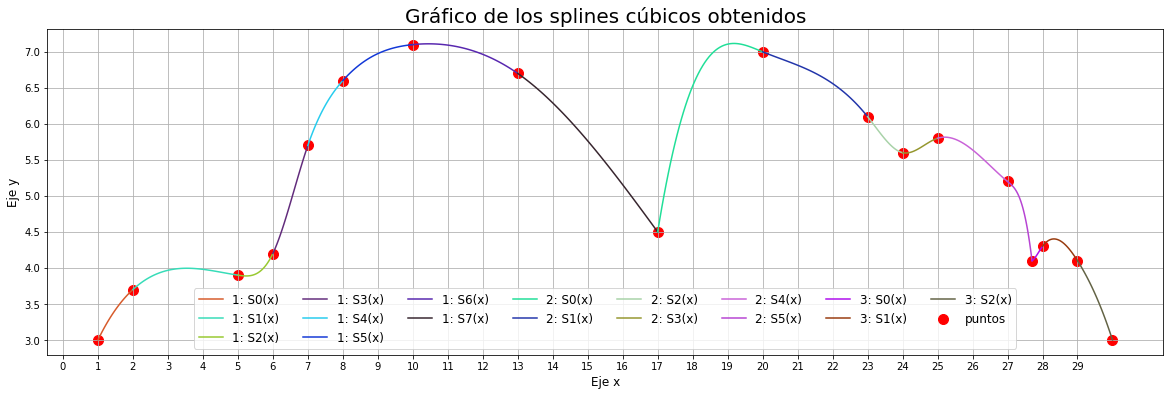

In [ ]:
#tamaño
plt.figure(figsize=(20,6))

#separacion de ejes
plt.xticks(np.arange(0, 30, 1)) 
plt.yticks(np.arange(2, 8, 0.5)) 

#puntos a interpolar
plt.scatter(x_coord, y_coord, label= "puntos", color= "red", marker= "o", s=100) 
    
#____________definición curvas

#curva 1
for i in range(len(x_curva1)-1):
  plt.plot( x[i],
           [(a_curva1[i] +
              b_curva1[i]*(x-x_curva1[i]) +
              c_curva1[i]*(x-x_curva1[i])**2 +
              d_curva1[i]*(x-x_curva1[i])**3
            ) for x in x[i]],
           c=color[i],
           label='''1: S{i}(x)'''.format(i=i)
          )

#curva 2
for j in range(len(x_curva2)-1):
  plt.plot( x[len(x_curva1)-1+j],
          [(  a_curva2[j] +
              b_curva2[j]*(x-x_curva2[j]) +
              c_curva2[j]*(x-x_curva2[j])**2 +
              d_curva2[j]*(x-x_curva2[j])**3
            ) for x in x[len(x_curva1)-1+j]],
           c=color[i+j+1],
           label='''2: S{j}(x)'''.format(j=j)
          )

#curva 3
for k in range(len(x_curva3)-1):
  plt.plot( x[i+j+2+k],
          [(  a_curva3[k] +
              b_curva3[k]*(x-x_curva3[k]) +
              c_curva3[k]*(x-x_curva3[k])**2 +
              d_curva3[k]*(x-x_curva3[k])**3
            ) for x in x[i+j+2+k]],
           c=color[i+j+k+2],
           label='''3: S{k}(x)'''.format(k=k)
          )

#labels
plt.title("Gráfico de los splines cúbicos obtenidos", fontsize=20)
plt.xlabel("Eje x", fontsize=12)
plt.ylabel("Eje y", fontsize=12)
plt.legend(fontsize = "large", ncol=8, loc = "lower center")

plt.grid()
plt.show()

#### $\textrm{Visualizacion curva 1}$

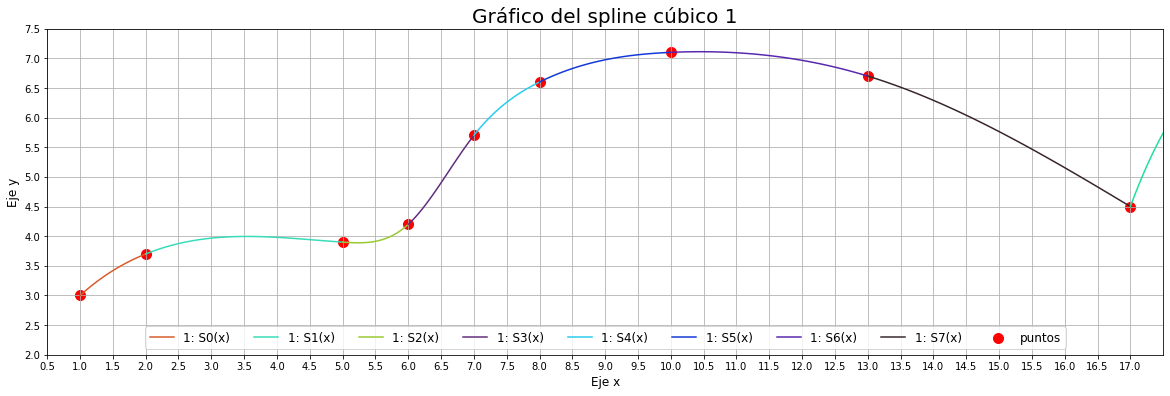

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
import random

#tamaño
plt.figure(figsize=(20,6))
plt.xlim(0.5, 17.5)
plt.ylim(2.5,7.5)

#separacion de ejes
plt.xticks(np.arange(0.5, 17.5, 0.5)) 
plt.yticks(np.arange(2, 8, 0.5)) 

#puntos a interpolar
plt.scatter(x_coord, y_coord, label= "puntos", color= "red", marker= "o", s=100) 

#definición curvas

#curva 1
for i in range(len(x_curva1)-1):
  plt.plot( x[i],
           [( a_curva1[i] +
              b_curva1[i]*(x-x_curva1[i]) +
              c_curva1[i]*(x-x_curva1[i])**2 +
              d_curva1[i]*(x-x_curva1[i])**3
            ) for x in x[i]],
           c=color[i],
           label='''1: S{i}(x)'''.format(i=i)
          )

#curva 2: solo S0
plt.plot(x[len(x_curva1)-1],
         [(a_curva2[0]+b_curva2[0]*(x-x_curva2[0])+c_curva2[0]*(x-x_curva2[0])**2 +d_curva2[0]*(x-x_curva2[0])**3
           ) for x in x[len(x_curva1)-1]],
           c=color[i+1])

#labels
plt.title("Gráfico del spline cúbico 1", fontsize=20)
plt.xlabel("Eje x", fontsize=12)
plt.ylabel("Eje y", fontsize=12)
plt.legend(fontsize = "large",ncol=10, loc = "lower center")

plt.grid()
plt.show()

#### $\textrm{Visualizacion curva 2}$

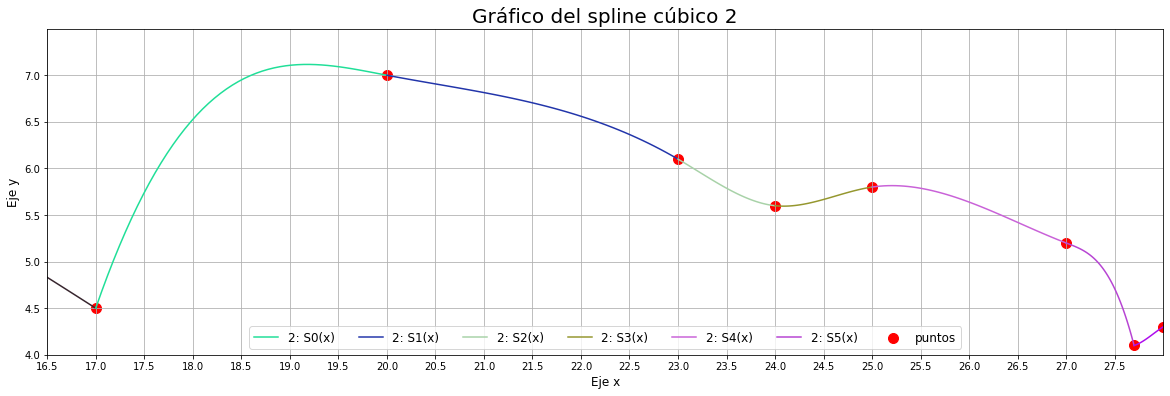

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
import random

#tamaño
plt.figure(figsize=(20,6))
plt.xlim(16.5, 28)
plt.ylim(4,7.5)

#separacion de ejes
plt.xticks(np.arange(16.5, 28, 0.5)) 
plt.yticks(np.arange(4, 7.5, 0.5)) 

#puntos a interpolar
plt.scatter(x_coord, y_coord, label= "puntos", color= "red", marker= "o", s=100) 

#definición curvas

tope = len(x_curva1)-2
#curva 1: solo último Sj
plt.plot(x[tope],
         [(a_curva1[tope]+b_curva1[tope]*(x-x_curva1[tope])+c_curva1[tope]*(x-x_curva1[tope])**2+d_curva1[tope]*(x-x_curva1[tope])**3) for x in x[tope]],
           c=color[tope])

i = tope
#curva 2
for j in range(len(x_curva2)-1):
  plt.plot( x[len(x_curva1)-1+j],
          [(  a_curva2[j] +
              b_curva2[j]*(x-x_curva2[j]) +
              c_curva2[j]*(x-x_curva2[j])**2 +
              d_curva2[j]*(x-x_curva2[j])**3
            ) for x in x[len(x_curva1)-1+j]],
           c=color[i+j+1],
           label='''2: S{j}(x)'''.format(j=j)
           )

#curva 3: solo S0
plt.plot(x[i+j+2],
          [(a_curva3[0]+b_curva3[0]*(x-x_curva3[0])+c_curva3[0]*(x-x_curva3[0])**2+d_curva3[0]*(x-x_curva3[0])**3) for x in x[i+j+2]],
           c=color[i+j+2])

#labels
plt.title("Gráfico del spline cúbico 2", fontsize=20)
plt.xlabel("Eje x", fontsize=12)
plt.ylabel("Eje y", fontsize=12)
plt.legend(fontsize = "large",ncol=10, loc = "lower center")

plt.grid()
plt.show()

#### $\textrm{Visualizacion curva 3}$

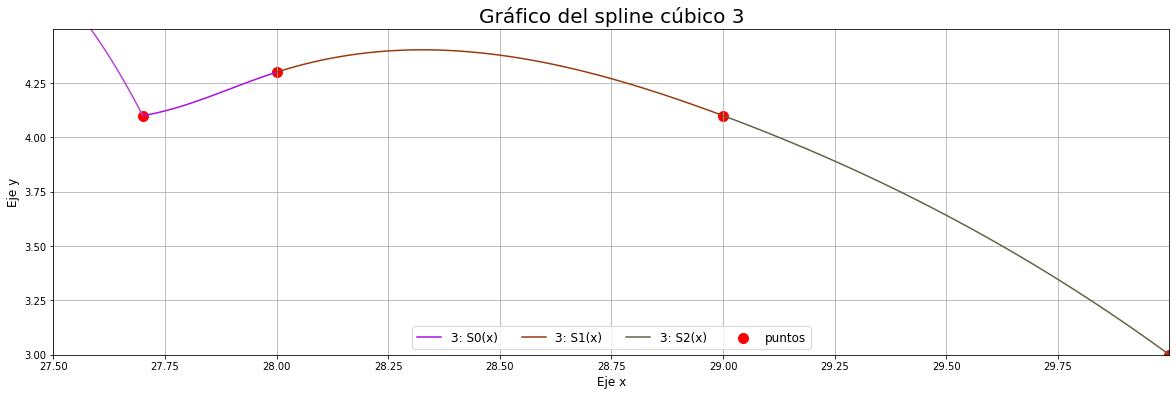

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *
import random

#tamaño
plt.figure(figsize=(20,6))
plt.xlim(27.5, 30)
plt.ylim(3,4.5)

#separacion de ejes
plt.xticks(np.arange(27.5, 30, 0.25)) 
plt.yticks(np.arange(3, 4.5, 0.25)) 

#puntos a interpolar
plt.scatter(x_coord, y_coord, label= "puntos", color= "red", marker= "o", s=100) 

#definición curvas

i = len(x_curva1)-2

#curva 2: Solo el último Sj
tope = len(x_curva2)-2
plt.plot( x[len(x_curva1)-1+tope],
          [(a_curva2[tope]+b_curva2[tope]*(x-x_curva2[tope]) +
              c_curva2[tope]*(x-x_curva2[tope])**2 +
              d_curva2[tope]*(x-x_curva2[tope])**3
            ) for x in x[len(x_curva1)-1+tope]],
           c=color[i+tope+1]
           )

#curva 3
for k in range(len(x_curva3)-1):
  plt.plot( x[i+j+2+k],
          [(  a_curva3[k] +
              b_curva3[k]*(x-x_curva3[k]) +
              c_curva3[k]*(x-x_curva3[k])**2 +
              d_curva3[k]*(x-x_curva3[k])**3
            ) for x in x[i+j+2+k]],
           c=color[i+j+k+2],
           label='''3: S{k}(x)'''.format(k=k)
          )

#labels
plt.title("Gráfico del spline cúbico 3", fontsize=20)
plt.xlabel("Eje x", fontsize=12)
plt.ylabel("Eje y", fontsize=12)
plt.legend(fontsize = "large",ncol=10, loc = "lower center")

plt.grid()
plt.show()